In [2]:
# import modules
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy.ma as ma
import numpy as np
import netCDF4 as nc4
from scipy.io import netcdf
%matplotlib inline

In [7]:
def all_plots(date,maxTRC,maxTRC2,mintemp,maxtemp):
    
 fdir = "/home/albert/Data/NATL60/NATL60-CJM165-S/1d/2012/"
 TRCfile = fdir + 'NATL60-CJM165_'+date+'.1d_ptrcT_coinSW.nc'
 Tfile = fdir + 'NATL60-CJM165_'+date+'.1d_gridT_coinSW.nc'
 Ufile = fdir + 'NATL60-CJM165_'+date+'.1d_gridU_coinSW.nc'
 Vfile = fdir + 'NATL60-CJM165_'+date+'.1d_gridV_coinSW.nc'
 Wfile = fdir + 'NATL60-CJM165_'+date+'.1d_gridW_coinSW.nc'
 TRC = xr.open_dataset(TRCfile)['TRC'][0]
 T = xr.open_dataset(Tfile)['votemper'][0]
 U = xr.open_dataset(Ufile)['vozocrtx'][0]
 V = xr.open_dataset(Vfile)['vomecrty'][0]
 W = xr.open_dataset(Wfile)['vovecrtz'][0]

 navlon = xr.open_dataset(TRCfile)['nav_lon']
 navlat = xr.open_dataset(TRCfile)['nav_lat']

 plt.figure(figsize=(20,15))
 plt.suptitle('Champs de surface (x,y) x=100:120 y=0:75 z=0 '+date,fontsize=16)
 plt.subplot(2,2,2)
 plt.pcolor(ma.masked_invalid(TRC[0,0:75,100:120]),vmin=0,vmax=maxTRC,cmap='jet')
 plt.vlines(8.5,0,75)
 plt.hlines(30,0,20)
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('TRC ')
 plt.subplot(2,2,1)
 plt.pcolor(ma.masked_invalid(U[0,0:75,100:120]),vmin=-0.1,vmax=0.1,cmap='seismic')
 plt.vlines(8.5,0,75)
 plt.hlines(30,0,20)
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('U in m/s')
 plt.subplot(2,2,3)
 plt.pcolor(ma.masked_invalid(V[0,0:75,100:120]),vmin=0.8,vmax=1.2,cmap='jet')
 plt.vlines(8.5,0,75)
 plt.hlines(30,0,20)
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('V in m/s')
 plt.subplot(2,2,4)
 plt.pcolor(86400*ma.masked_invalid(W[0,0:75,100:120]),vmin=-0.02,vmax=0.02,cmap='seismic')
 plt.vlines(8.5,0,75)
 plt.hlines(30,0,20)
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('W in m/day')
 plt.savefig('/home/albert/Data/NATL60/NATL60-CJM165-PLOTS/cartesxy_TRC_temp_v_w_'+date+'.png')

 plt.figure(figsize=(20,15))
 plt.suptitle('Profils selon x en y=30 z=0 '+date,fontsize=16)
 plt.subplot(2,2,2)
 plt.plot(ma.masked_invalid(TRC[0,30,100:120]),'k-+')
 plt.title('TRC ')
 plt.subplot(2,2,1)
 plt.plot(ma.masked_invalid(U[0,30,100:120]),'g-+')
 plt.title('U in m/s')
 plt.subplot(2,2,3)
 plt.plot(ma.masked_invalid(V[0,30,100:120]),'g-+')
 plt.title('V in m/s')
 plt.subplot(2,2,4)
 plt.plot(86400*ma.masked_invalid(W[0,30,100:120]),'r-+')
 plt.title('W in m/day')
 plt.savefig('/home/albert/Data/NATL60/NATL60-CJM165-PLOTS/profilsx_y30_z0_TRC_temp_v_w_'+date+'.png')

 plt.figure(figsize=(20,15))
 plt.suptitle('Profils selon y en x=108 z=0 '+date,fontsize=16)
 plt.subplot(2,2,2)
 plt.plot(ma.masked_invalid(TRC[0,0:75,108]),'k-+')
 plt.title('TRC ')
 plt.subplot(2,2,1)
 plt.plot(ma.masked_invalid(U[0,0:75,108]),'g-+')
 plt.title('U in m/s')
 plt.subplot(2,2,3)
 plt.plot(ma.masked_invalid(V[0,0:75,108]),'g-+')
 plt.title('V in m/s')
 plt.subplot(2,2,4)
 plt.plot(86400*ma.masked_invalid(W[0,0:75,108]),'r-+')
 plt.title('W in m/day')
 plt.savefig('/home/albert/Data/NATL60/NATL60-CJM165-PLOTS/profilsy_x108_z0_TRC_temp_v_w_'+date+'.png')

 plt.figure(figsize=(20,15))
 plt.suptitle('Sections (x,z) x=100:120 y=3 z=0:50 '+date,fontsize=16)
 plt.subplot(2,2,2)
 plt.pcolor(ma.masked_invalid(TRC[0:50,2,100:120]),vmin=0,vmax=maxTRC,cmap='jet')
 plt.hlines(27.5,0,20)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('TRC')
 plt.subplot(2,2,1)
 plt.pcolor(ma.masked_invalid(U[0:50,2,100:120]),vmin=-0.1,vmax=0.1,cmap='seismic')
 plt.hlines(27.5,0,20)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('U in m/s')
 plt.subplot(2,2,3)
 plt.pcolor(ma.masked_invalid(V[0:50,2,100:120]),vmin=0.8,vmax=1.2,cmap='jet')
 plt.hlines(27.5,0,20)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('V in m/s')
 plt.subplot(2,2,4)
 plt.pcolor(ma.masked_invalid(W[0:50,2,100:120]),cmap='jet')
 plt.hlines(27.5,0,20)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('W in m/day')
 plt.savefig('/home/albert/Data/NATL60/NATL60-CJM165-PLOTS/sectionxz_TRC_temp_v_w_'+date+'.png')
             
 plt.figure(figsize=(20,15))
 plt.suptitle('Profils selon x en y=3 z=27 '+date,fontsize=16)
 plt.subplot(2,2,2)
 plt.plot(ma.masked_invalid(TRC[27,2,100:120]),'k-+')
 plt.title('TRC ')
 plt.subplot(2,2,1)
 plt.plot(ma.masked_invalid(U[27,2,100:120]),'g-+')
 plt.title('U in m/s')
 plt.subplot(2,2,3)
 plt.plot(ma.masked_invalid(V[27,2,100:120]),'g-+')
 plt.title('V in m/s')
 plt.subplot(2,2,4)
 plt.plot(86400*ma.masked_invalid(W[27,2,100:120]),'r-+')
 plt.title('W in m/day')
 plt.savefig('/home/albert/Data/NATL60/NATL60-CJM165-PLOTS/profilsx_y3_z27_TRC_temp_v_w_'+date+'.png')

 plt.figure(figsize=(20,15))
 plt.suptitle('Sections (y,z) x=108 y=0:75 z=0:50 '+date,fontsize=16)
 plt.subplot(2,2,2)
 plt.pcolor(ma.masked_invalid(TRC[0:50,0:75,107]),vmin=0,vmax=maxTRC2,cmap='jet')
 plt.hlines(20.5,0,75)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('TRC ')
 plt.subplot(2,2,1)
 plt.pcolor(ma.masked_invalid(U[0:50,0:75,107]),vmin=-0.1,vmax=0.1,cmap='seismic')
 plt.hlines(20.5,0,75)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('U in m/s')
 plt.subplot(2,2,3)
 plt.pcolor(ma.masked_invalid(V[0:50,0:75,107]),vmin=0.8,vmax=1.2,cmap='jet')
 plt.hlines(20.5,0,75)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('V in m/s')
 plt.subplot(2,2,4)
 plt.pcolor(86400*ma.masked_invalid(W[0:50,0:75,107]),vmin=-100,vmax=100,cmap='seismic')
 plt.hlines(20.5,0,75)
 plt.gca().invert_yaxis()
 plt.autoscale(tight=True)
 plt.colorbar(orientation='horizontal')
 plt.title('W in m/day') 
 plt.savefig('/home/albert/Data/NATL60/NATL60-CJM165-PLOTS/sectionyz_TRC_temp_v_w_'+date+'.png')

 plt.figure(figsize=(20,15))
 plt.suptitle('Profils selon y en x=108 z=20 '+date,fontsize=16)
 plt.subplot(2,2,2)
 plt.plot(ma.masked_invalid(TRC[20,0:75,107]),'k-+')
 plt.title('TRC ')
 plt.subplot(2,2,1)
 plt.plot(ma.masked_invalid(U[20,0:75,107]),'g-+')
 plt.title('U in m/s')
 plt.subplot(2,2,3)
 plt.plot(ma.masked_invalid(V[20,0:75,107]),'g-+')
 plt.title('V in m/s')
 plt.subplot(2,2,4)
 plt.plot(86400*ma.masked_invalid(W[20,0:75,107]),'r-+')
 plt.title('W in m/day')
 plt.savefig('/home/albert/Data/NATL60/NATL60-CJM165-PLOTS/profilsy_x108_z20_TRC_temp_v_w_'+date+'.png')



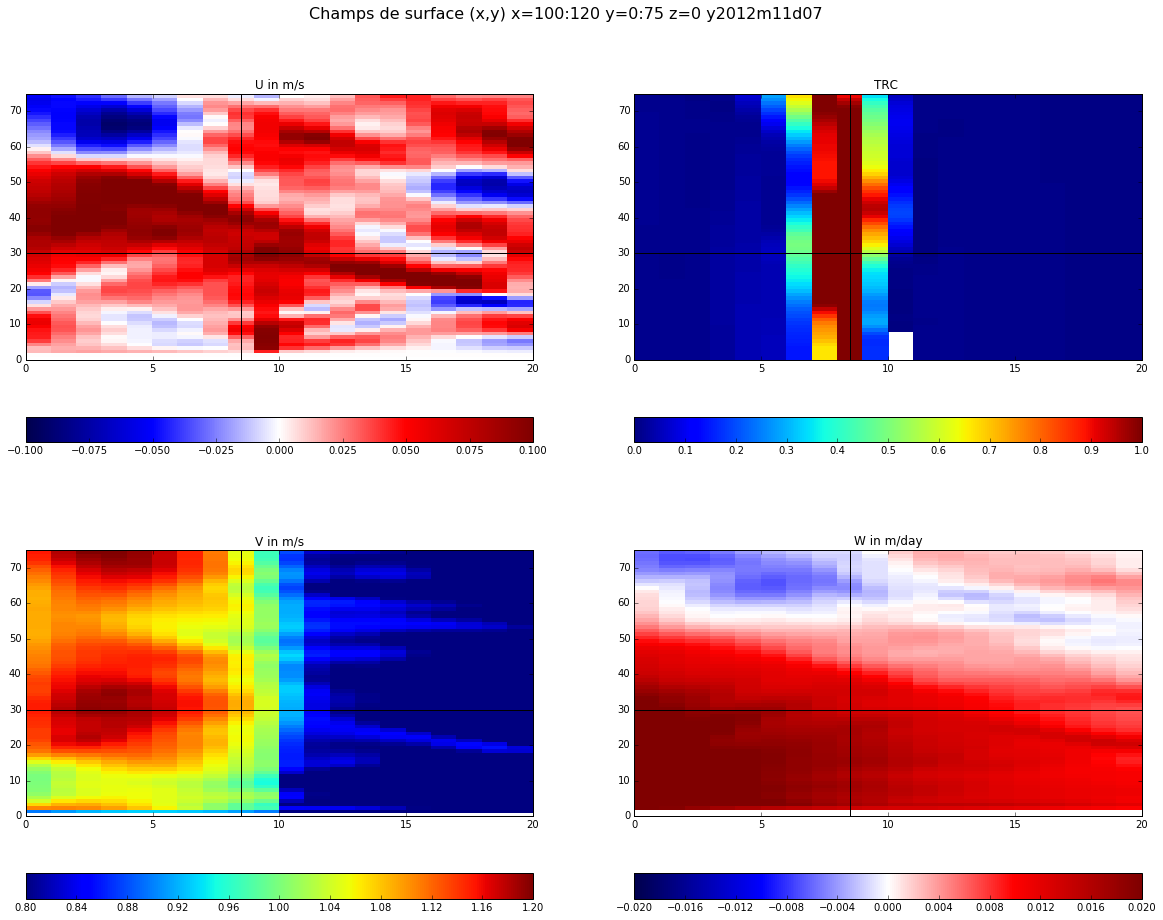

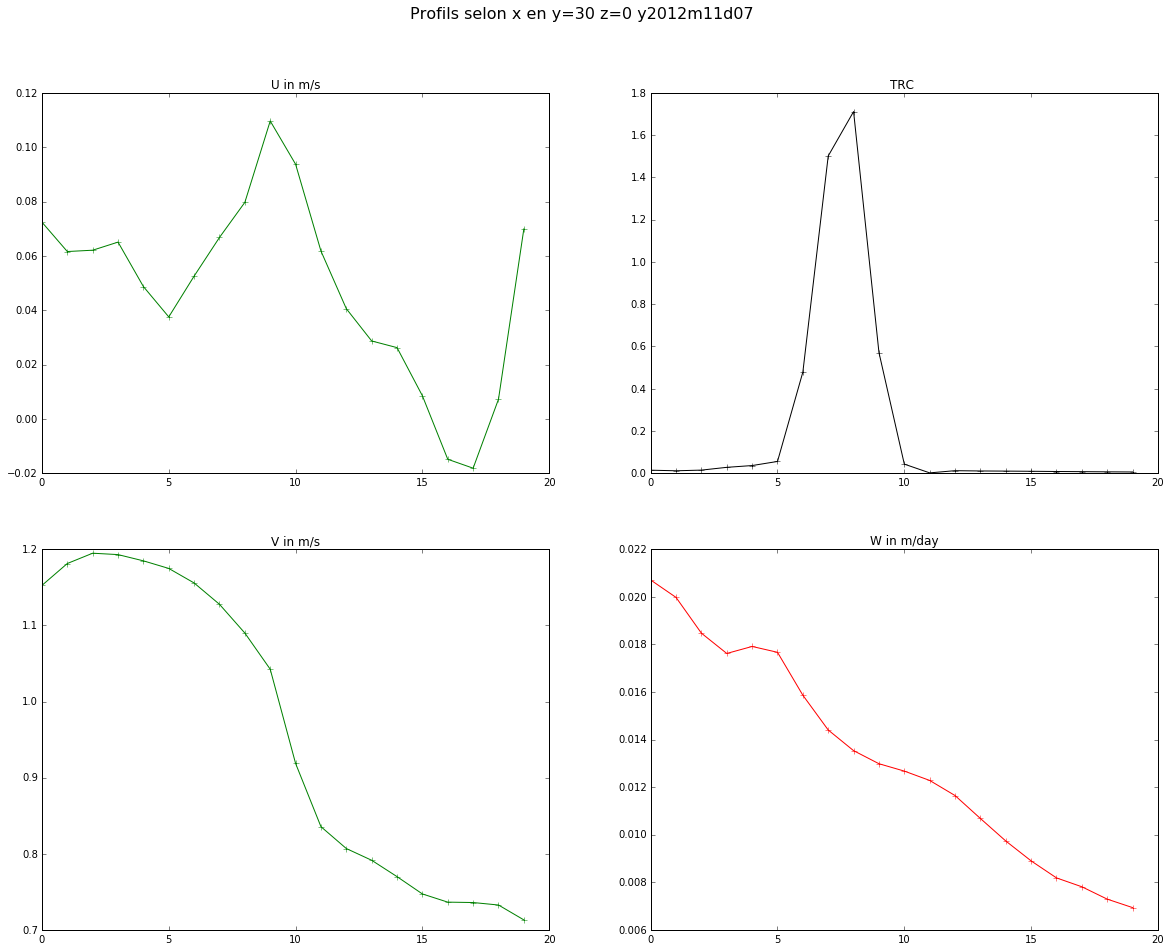

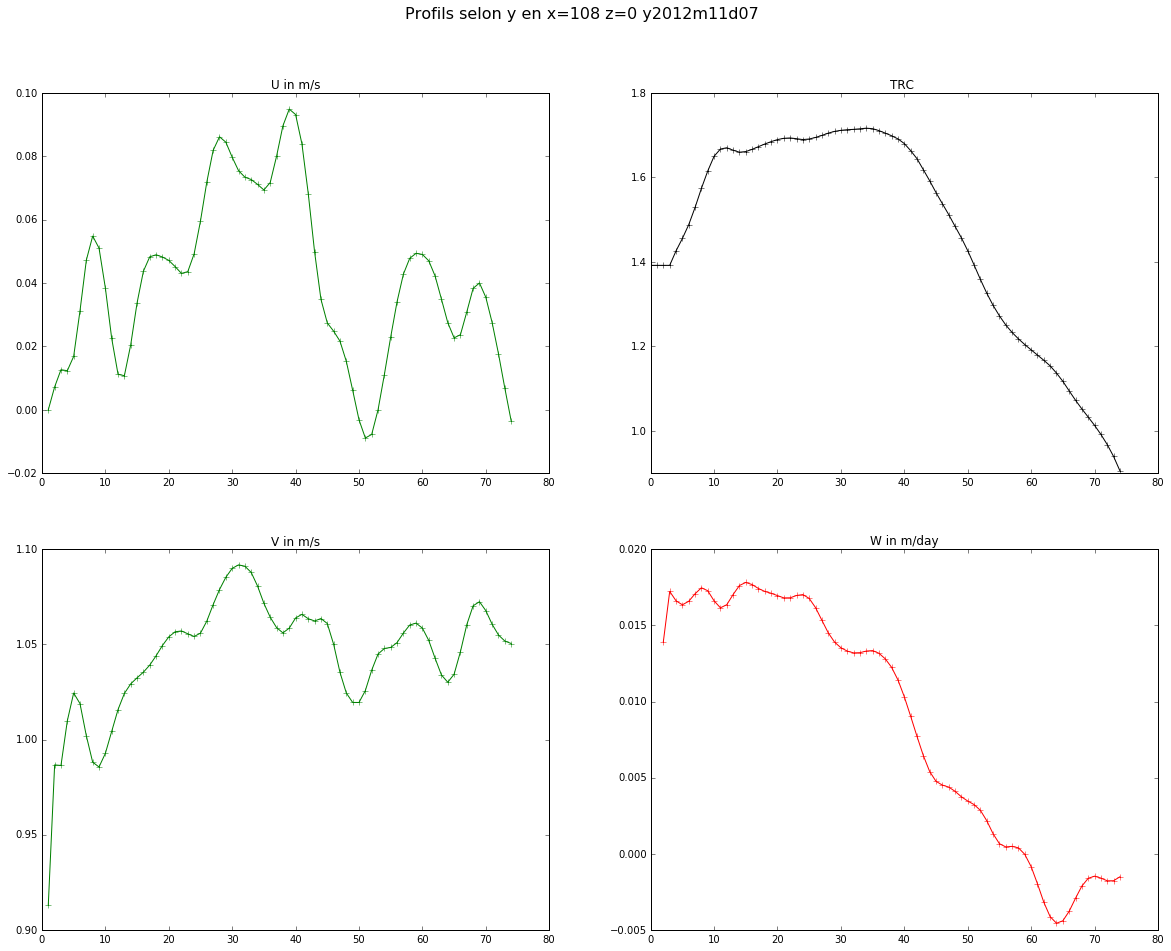

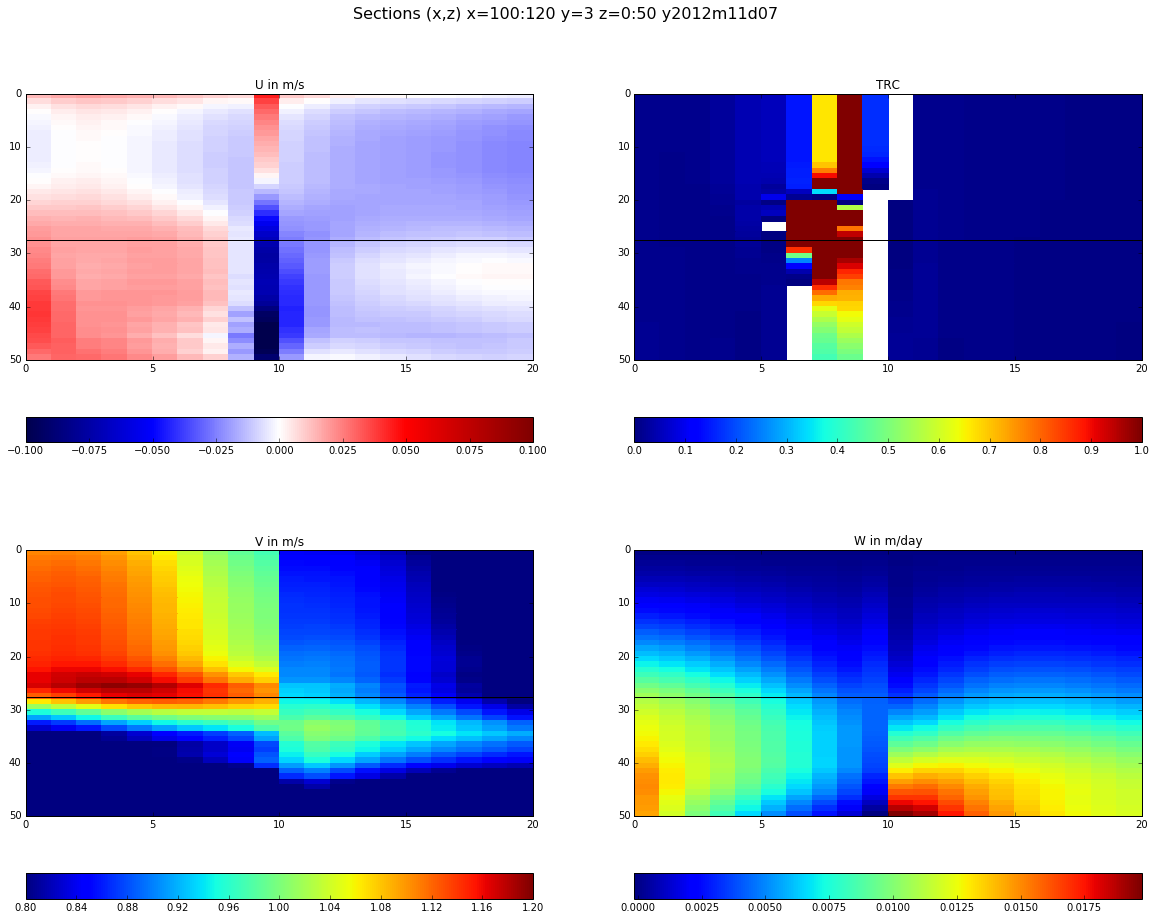

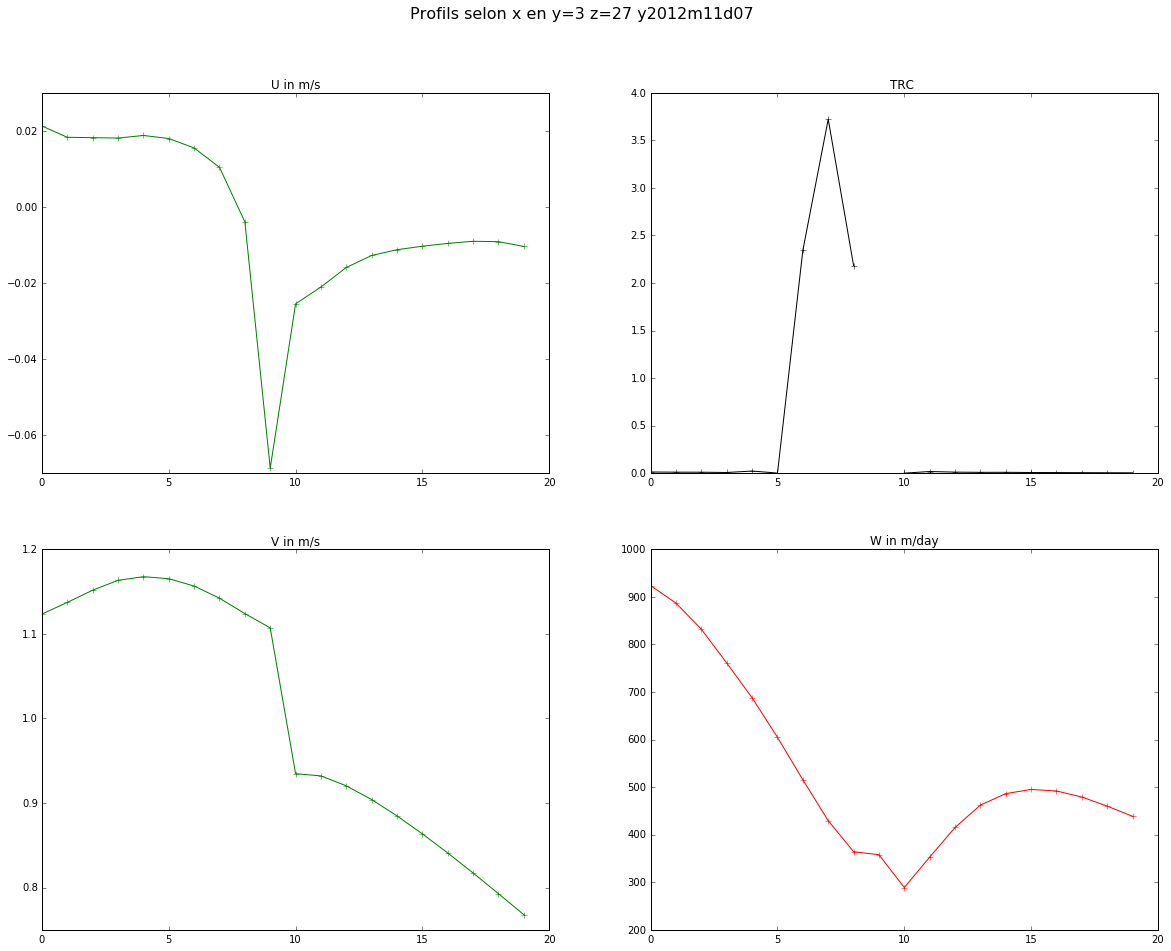

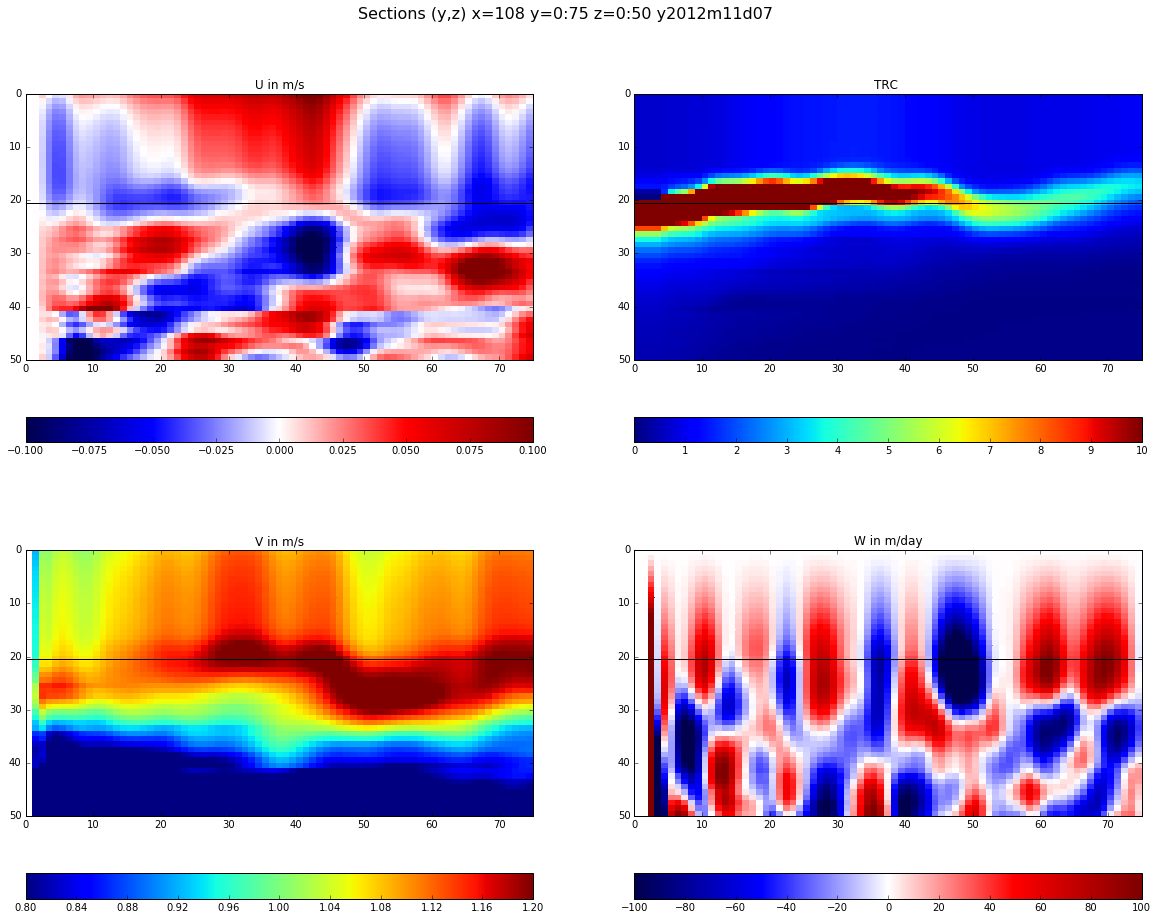

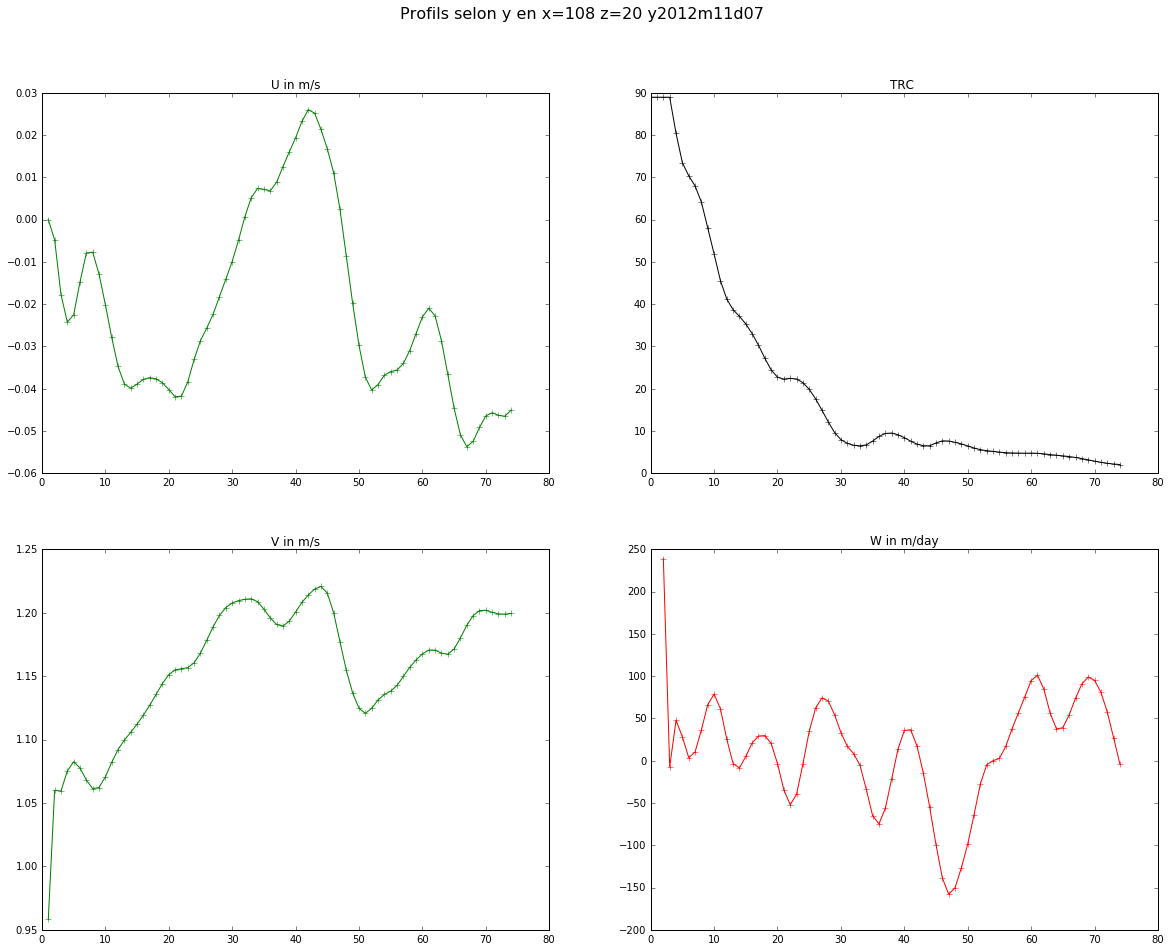

In [8]:
all_plots('y2012m11d07',1,10,27,27.6)

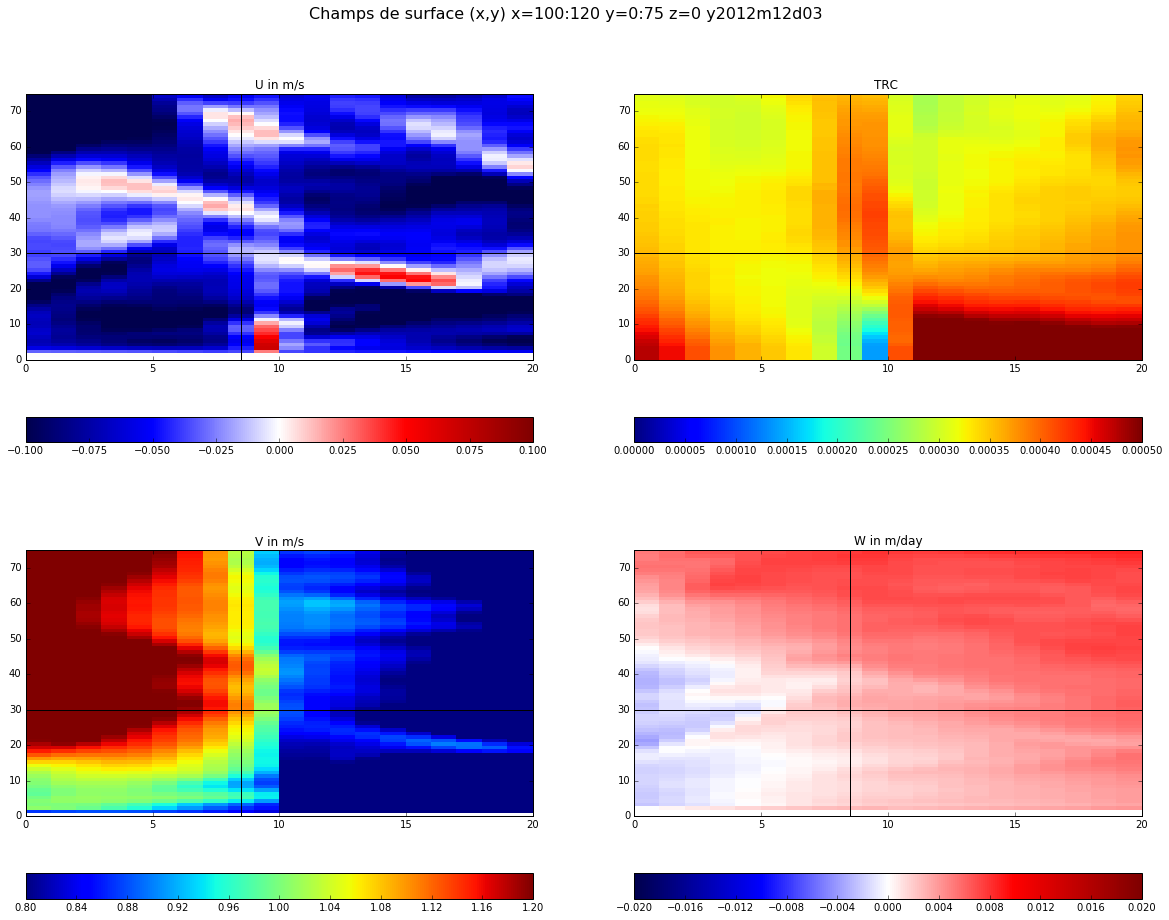

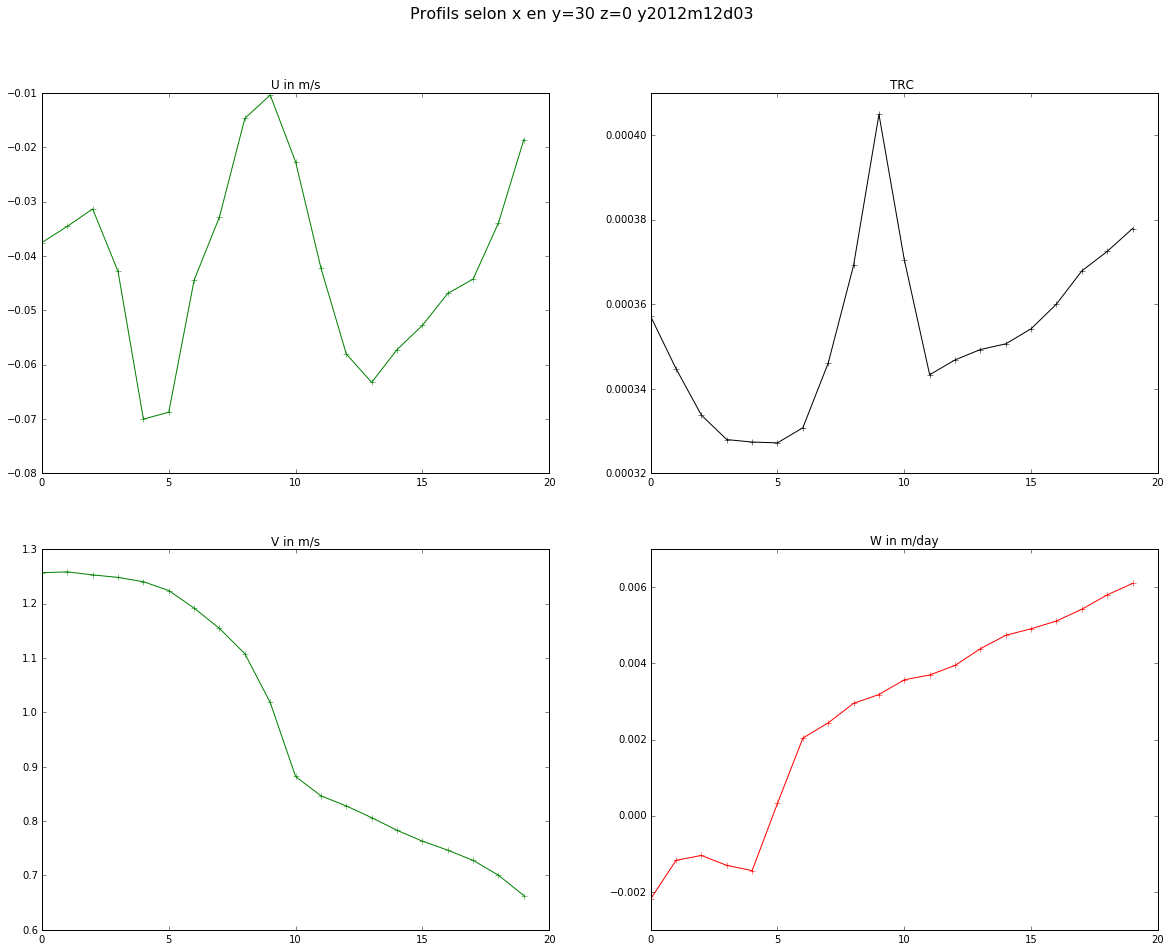

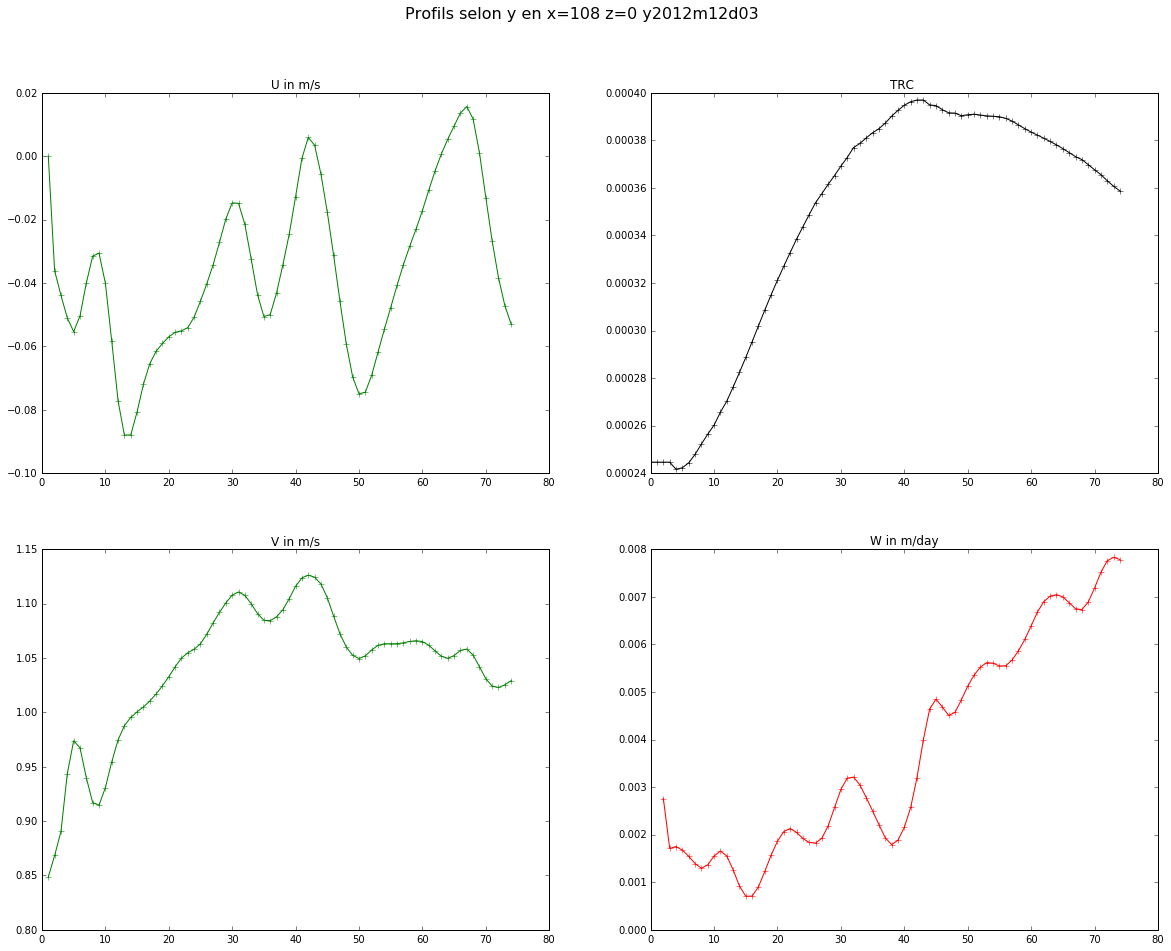

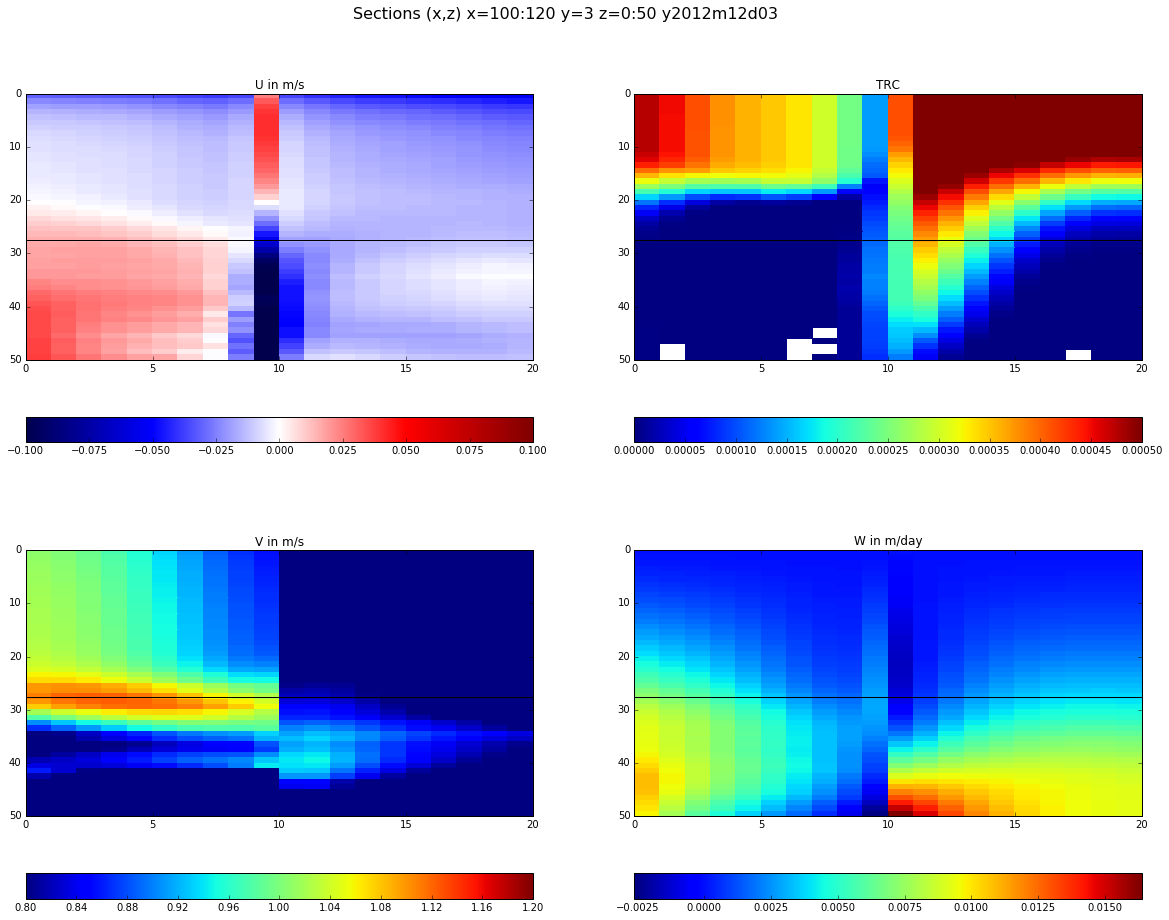

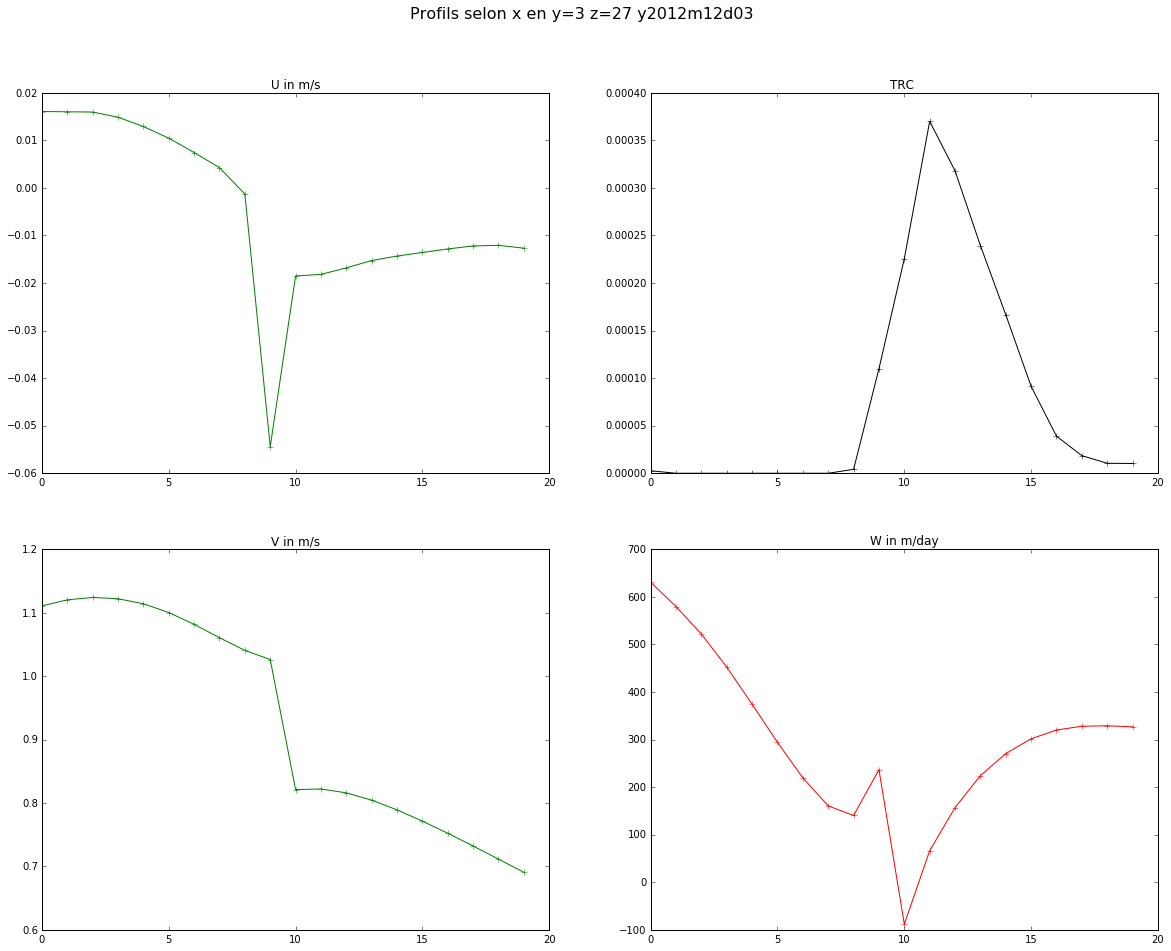

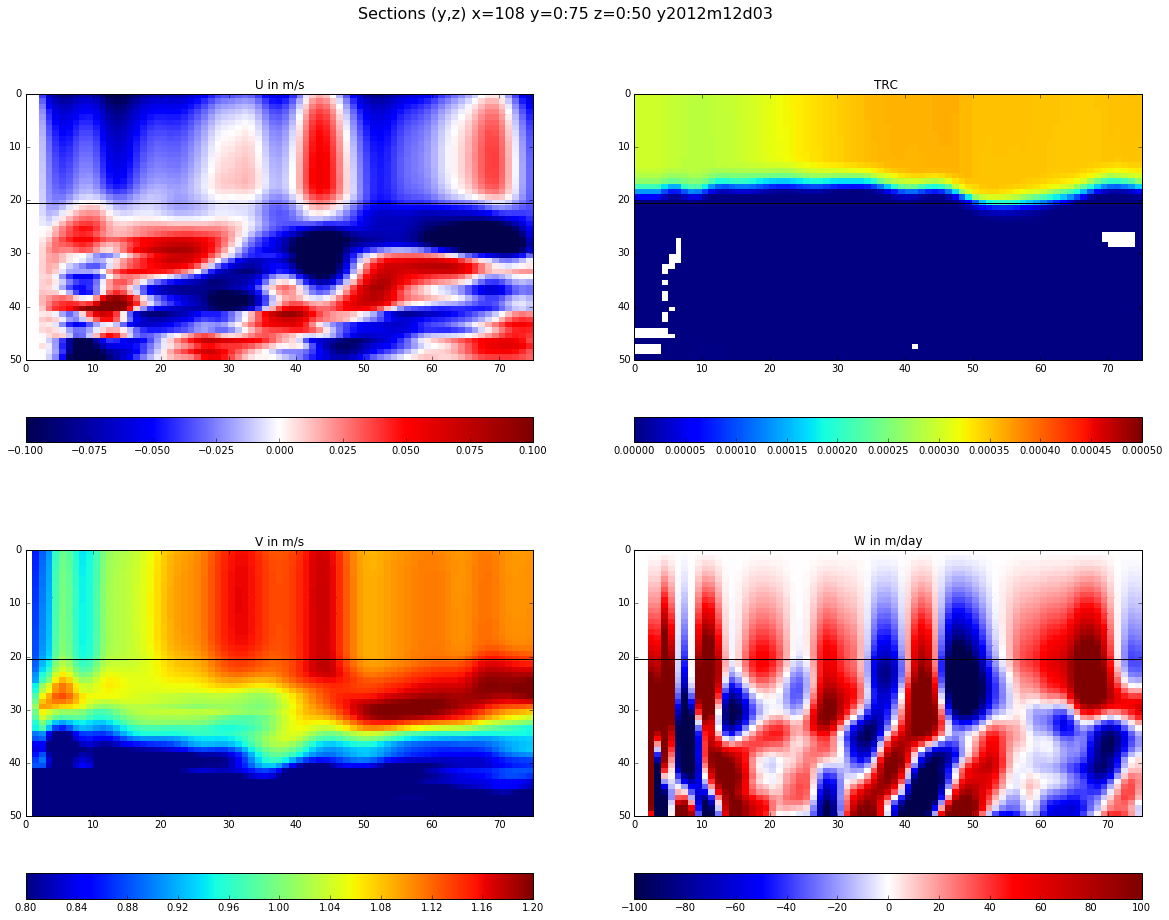

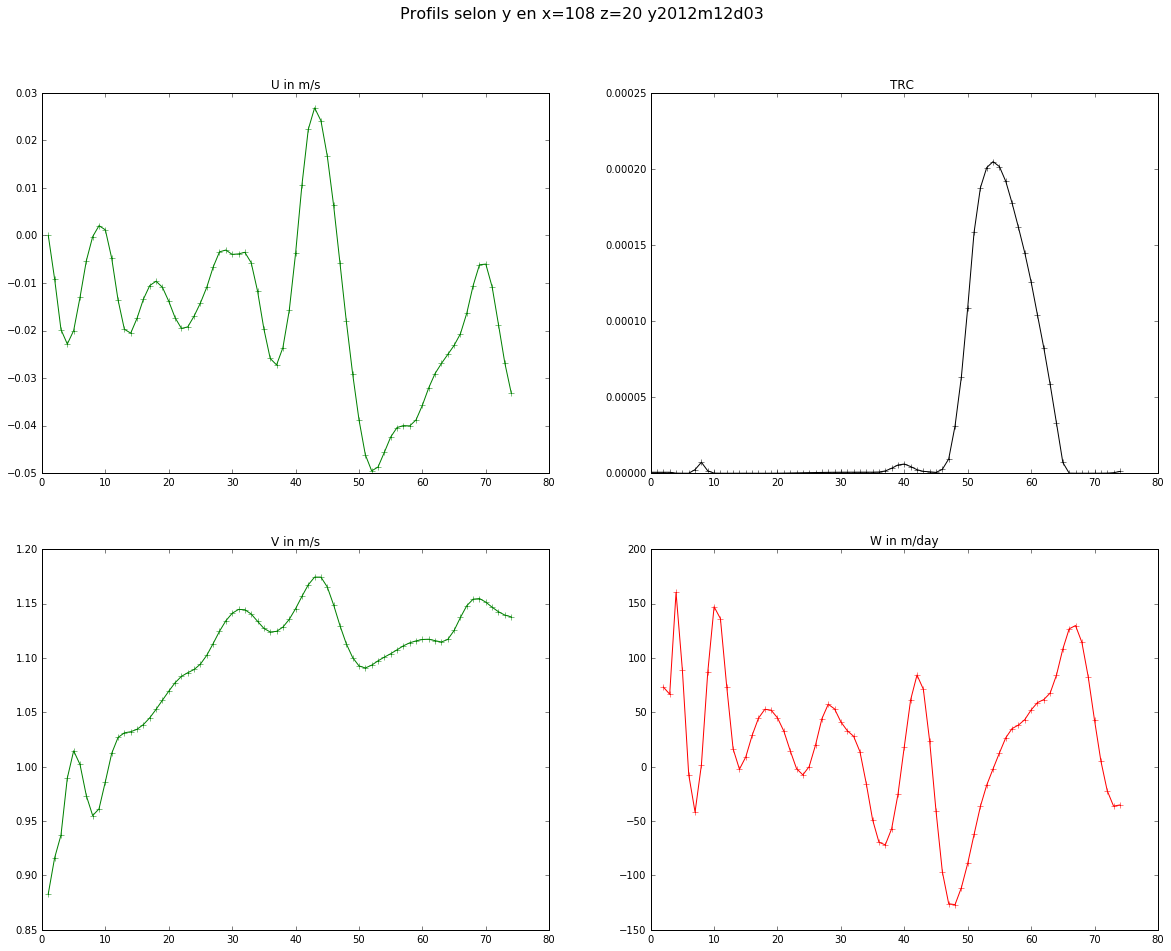

In [13]:
all_plots('y2012m12d03',0.0005,0.0005,27,27.6)

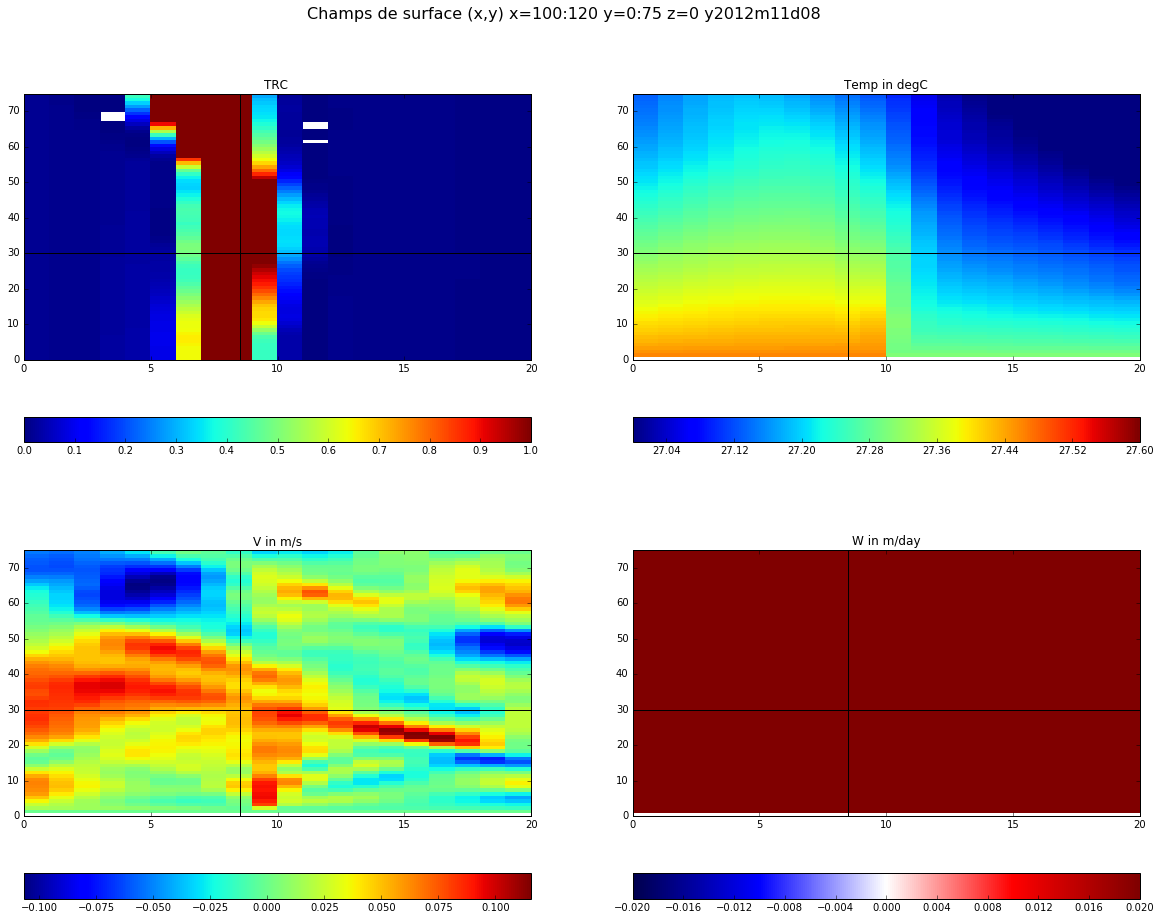

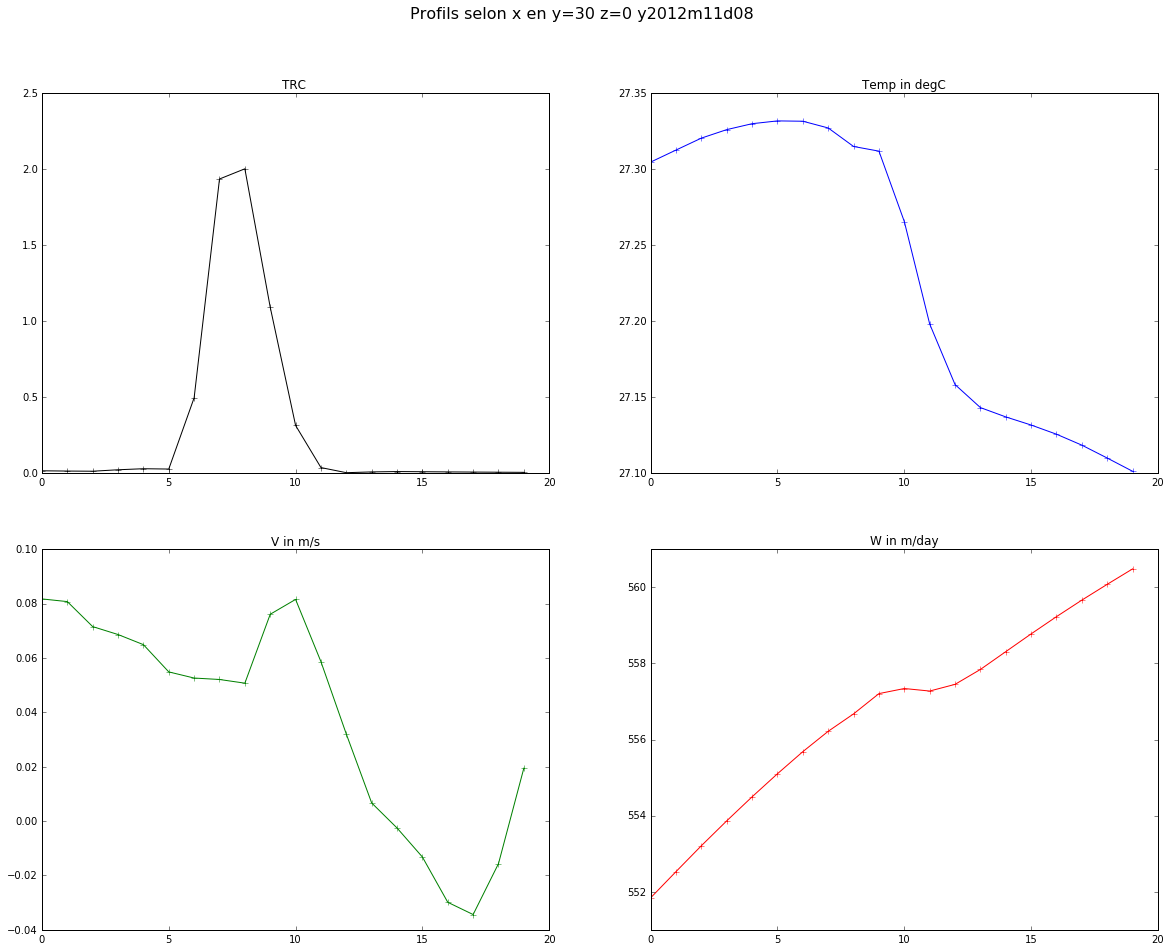

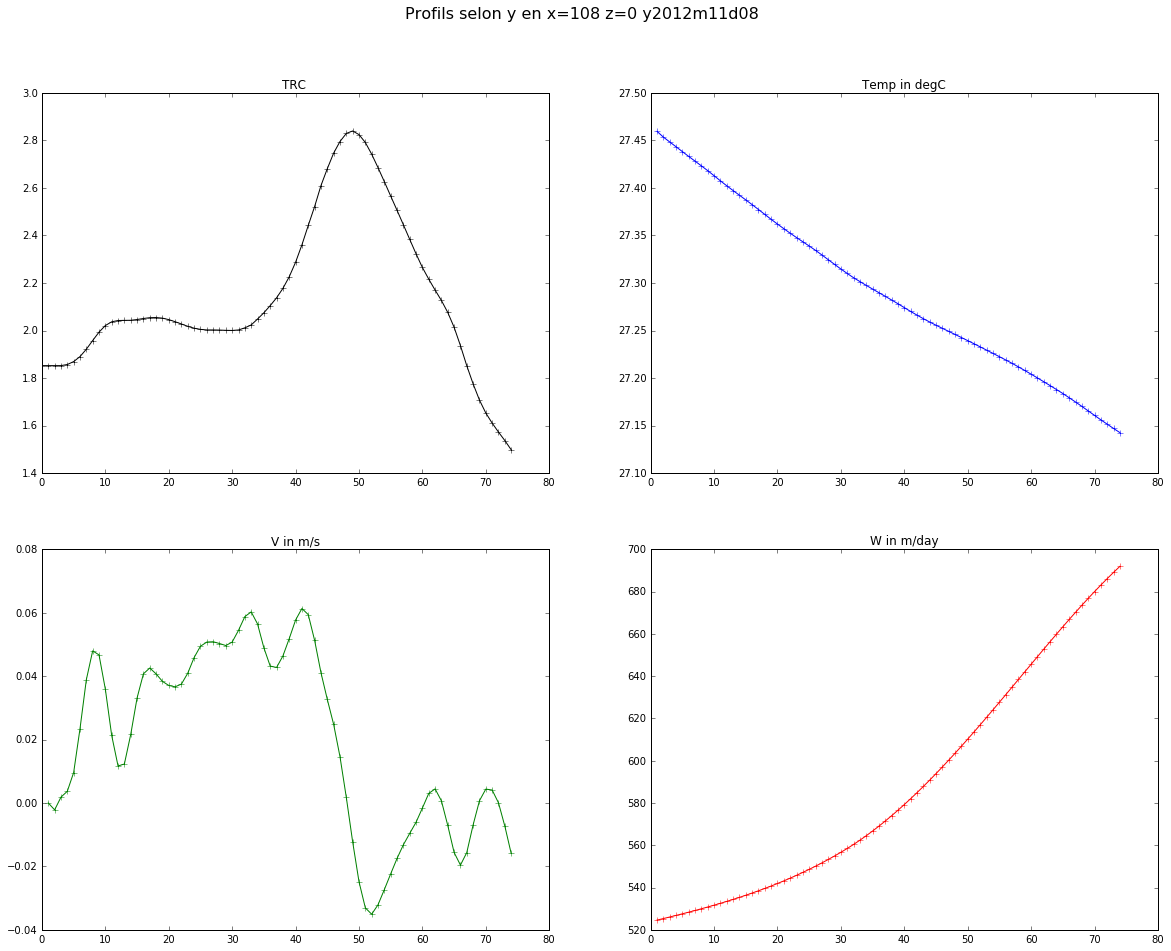

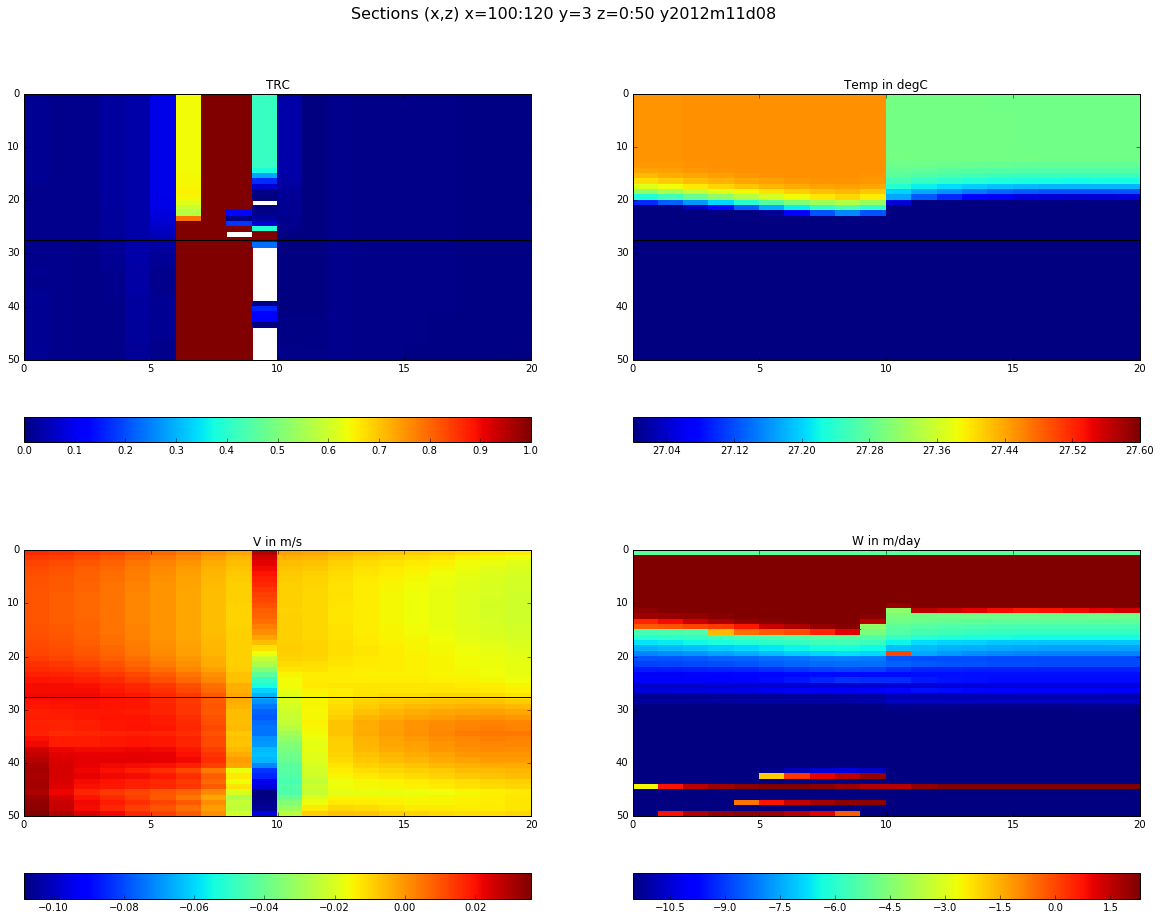

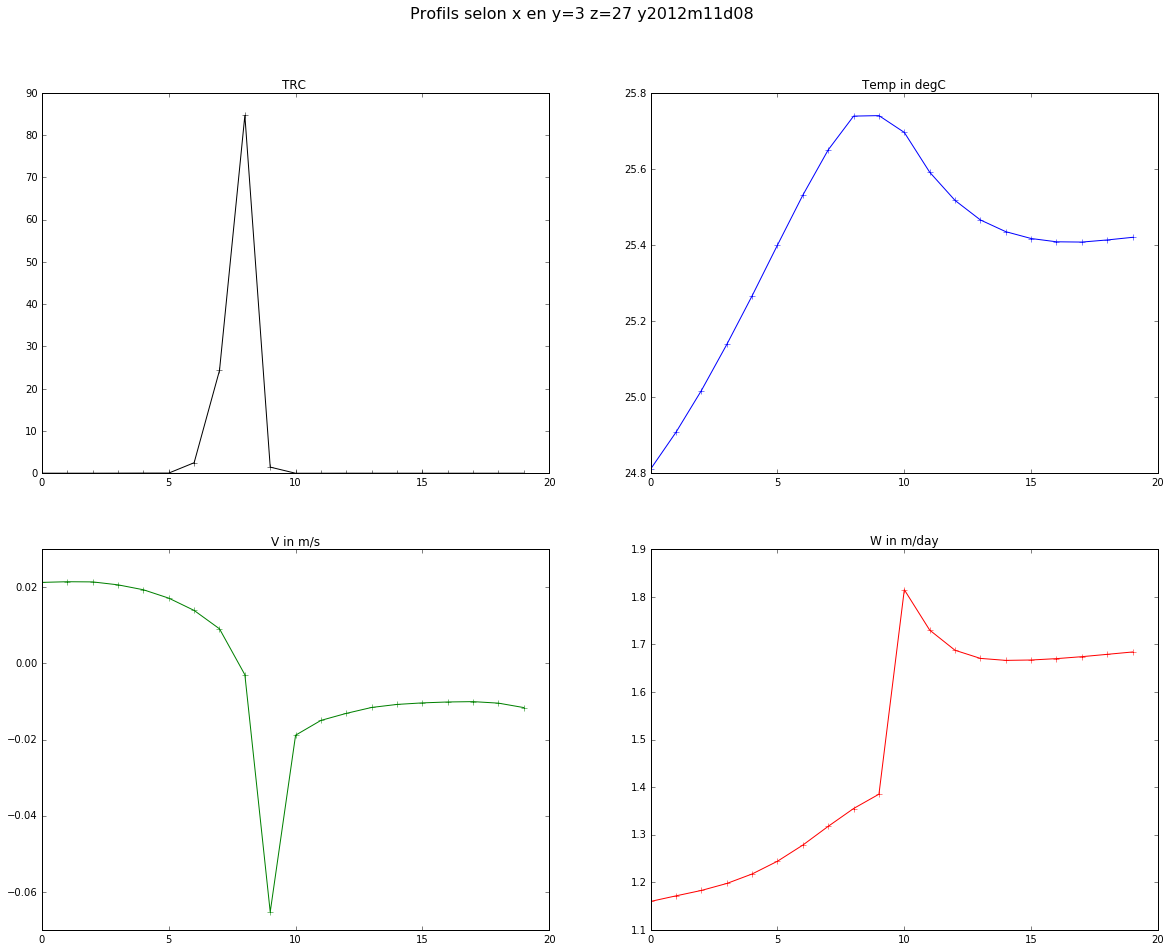

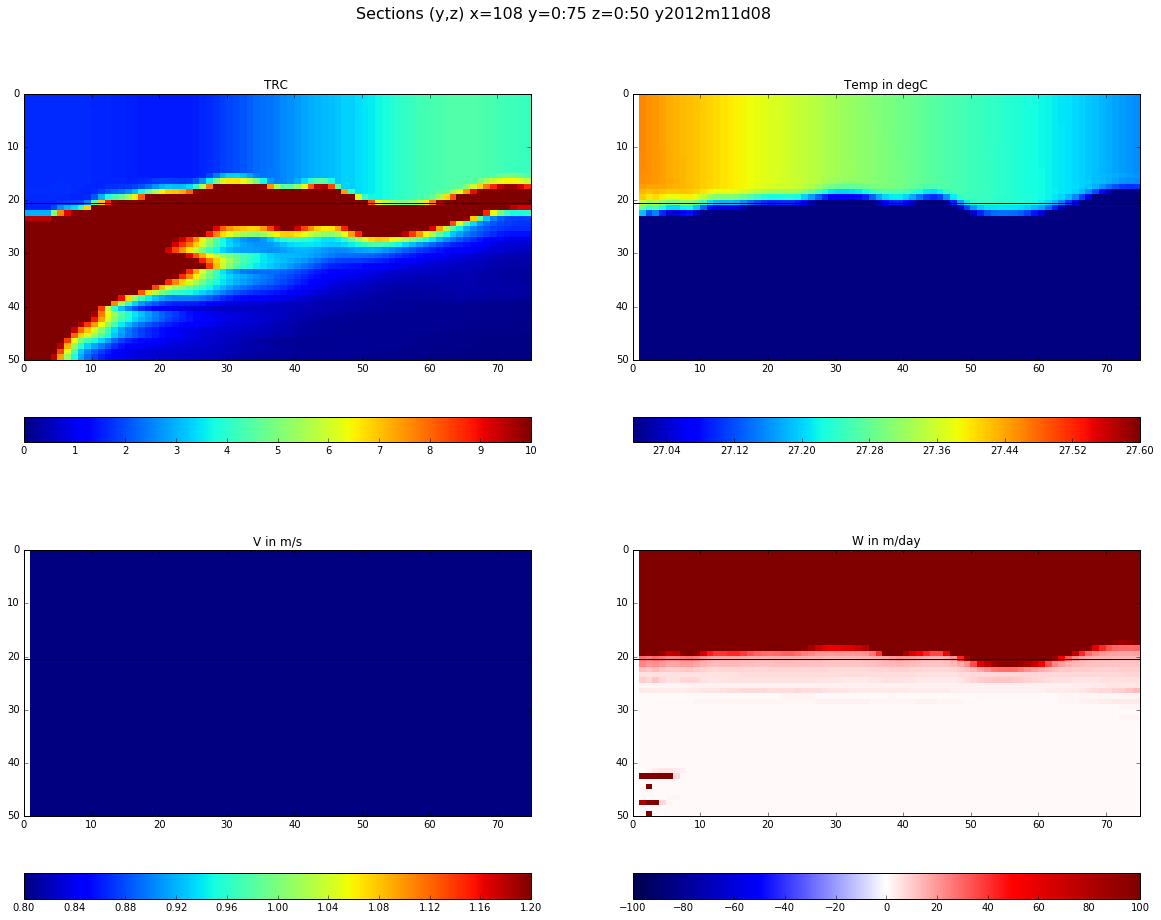

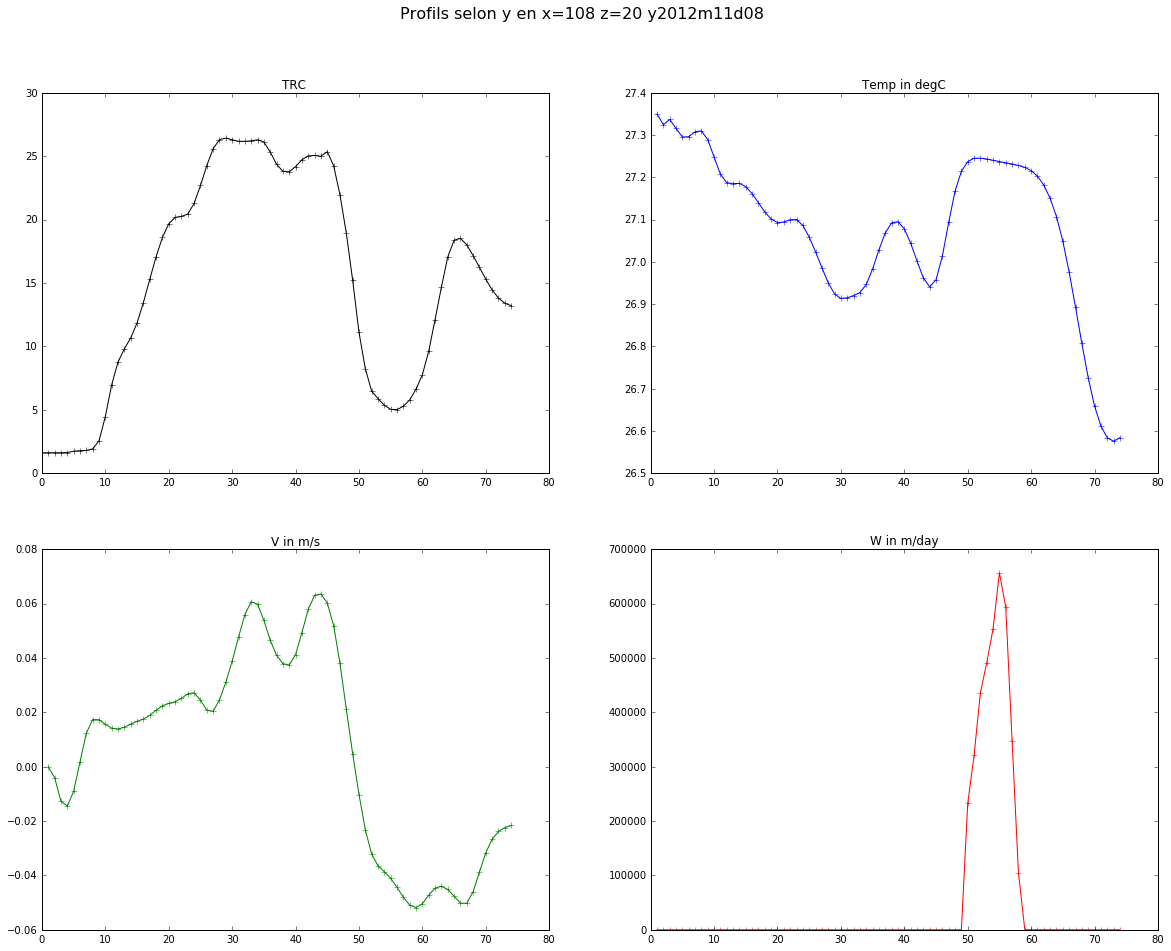

In [15]:
all_plots('y2012m11d08',1,10,27,27.6)

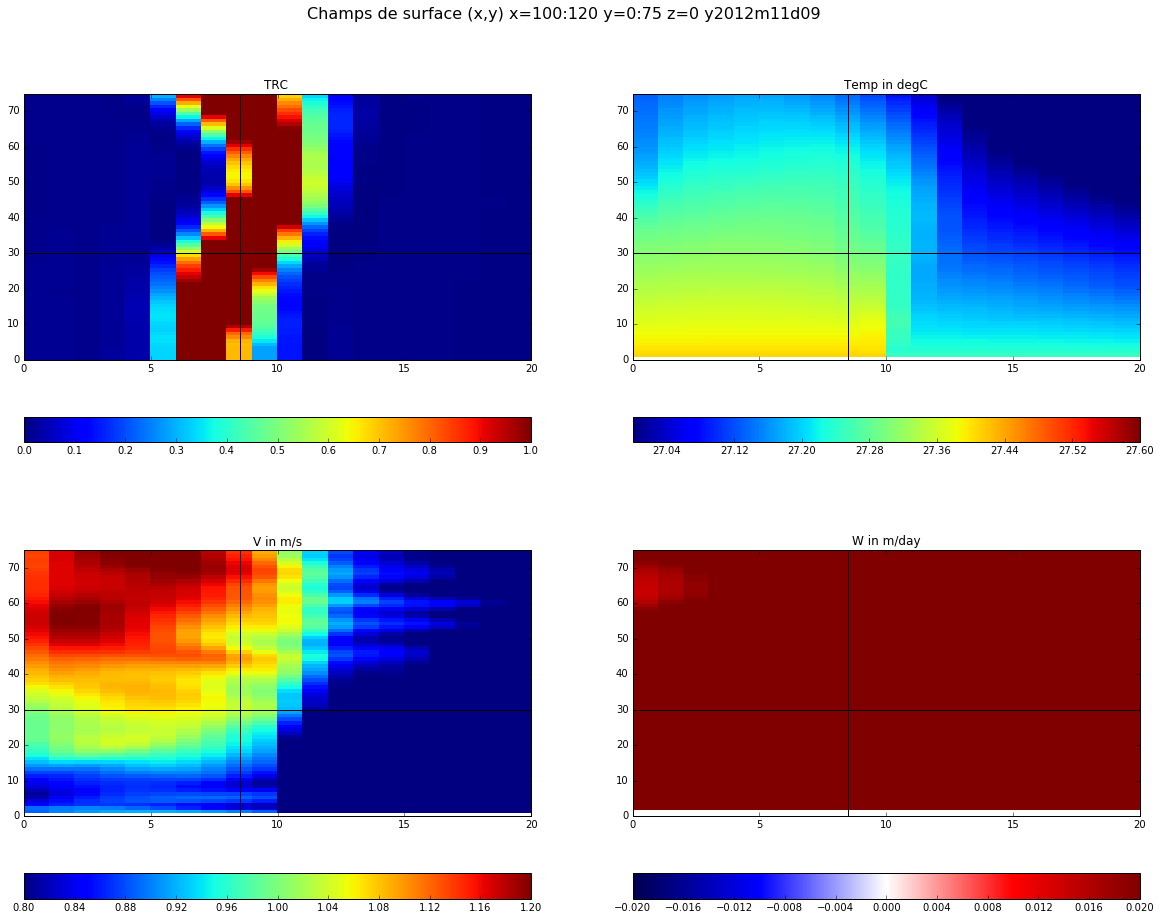

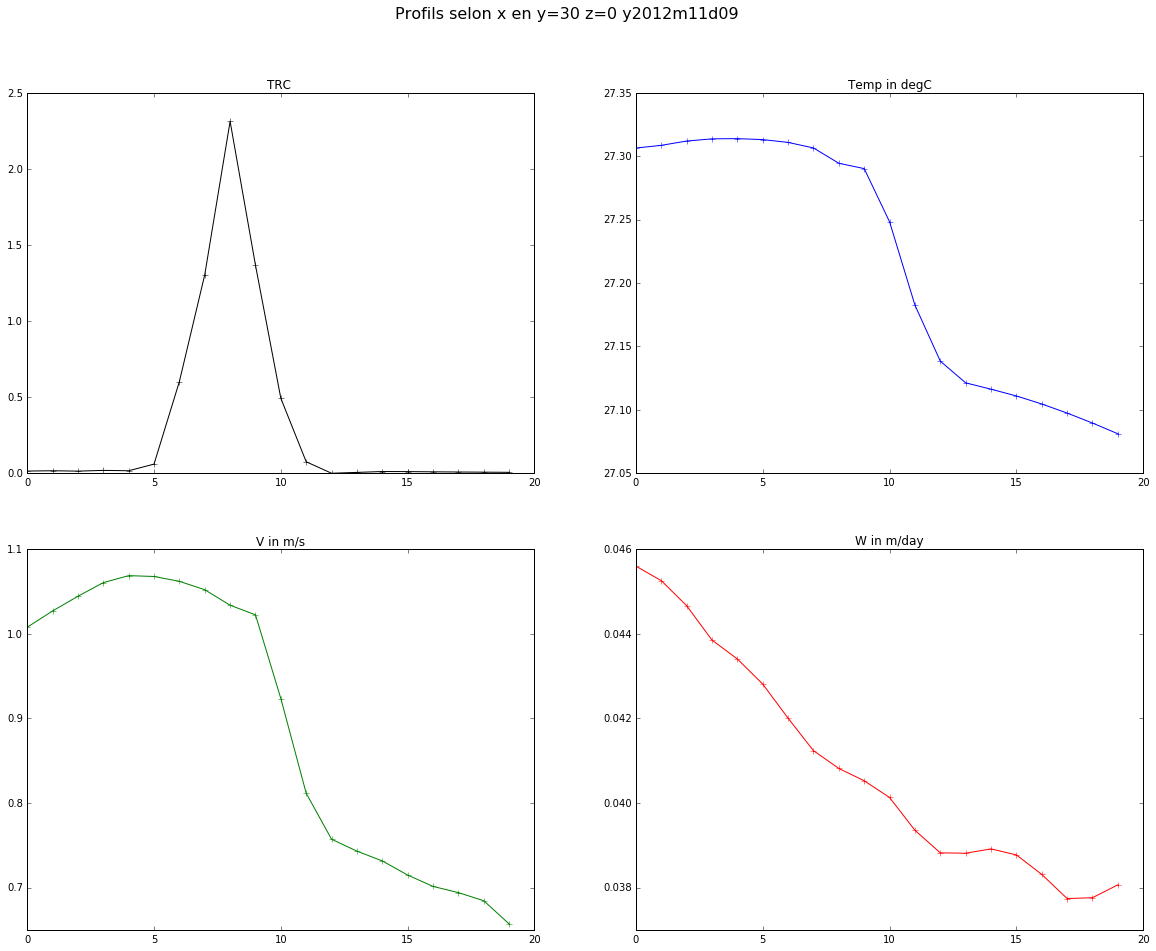

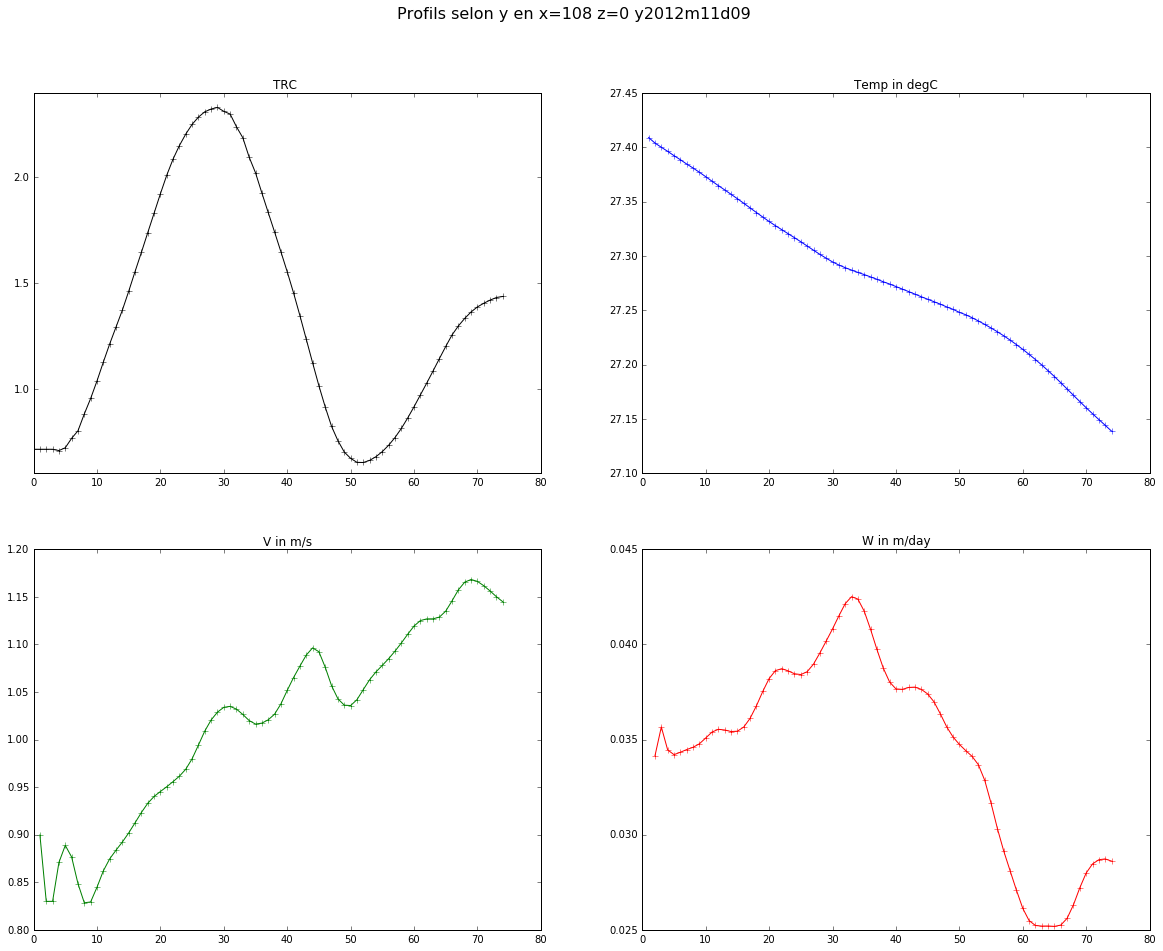

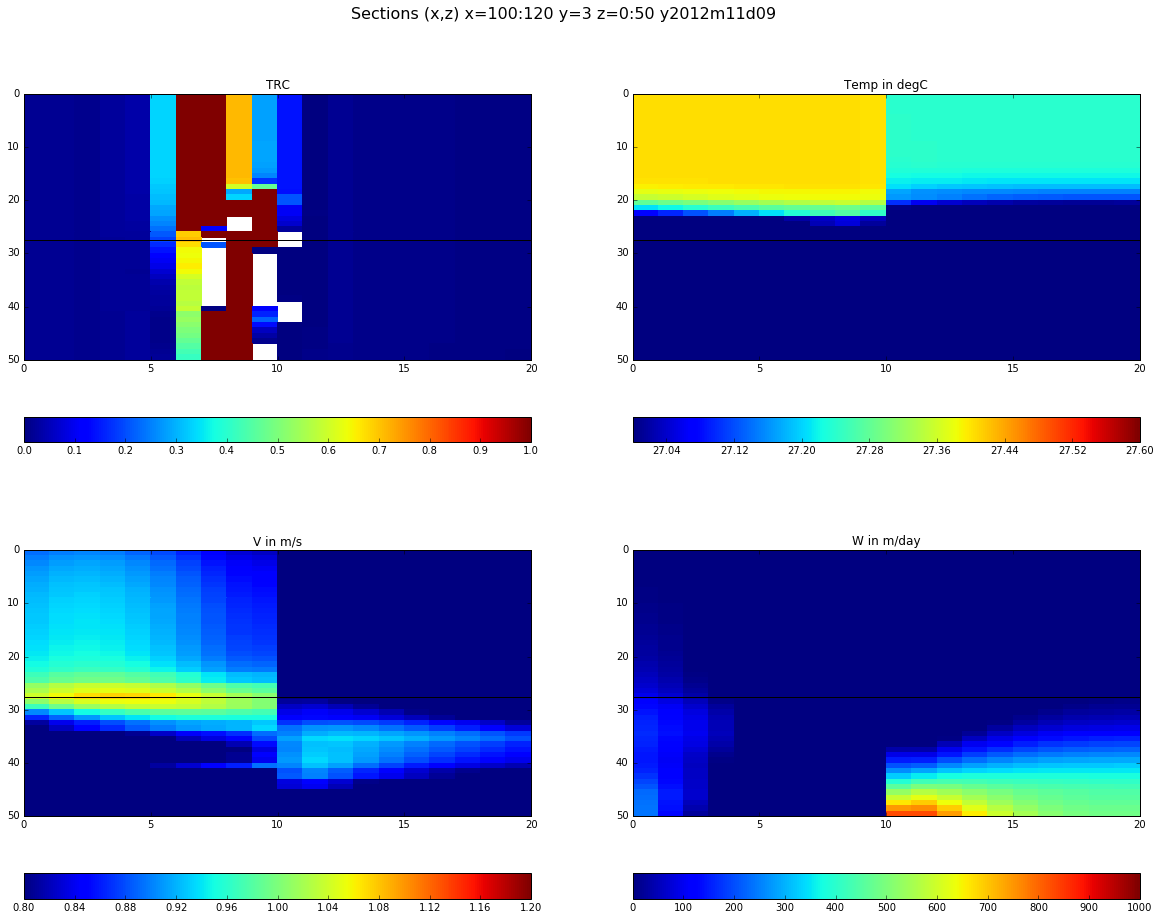

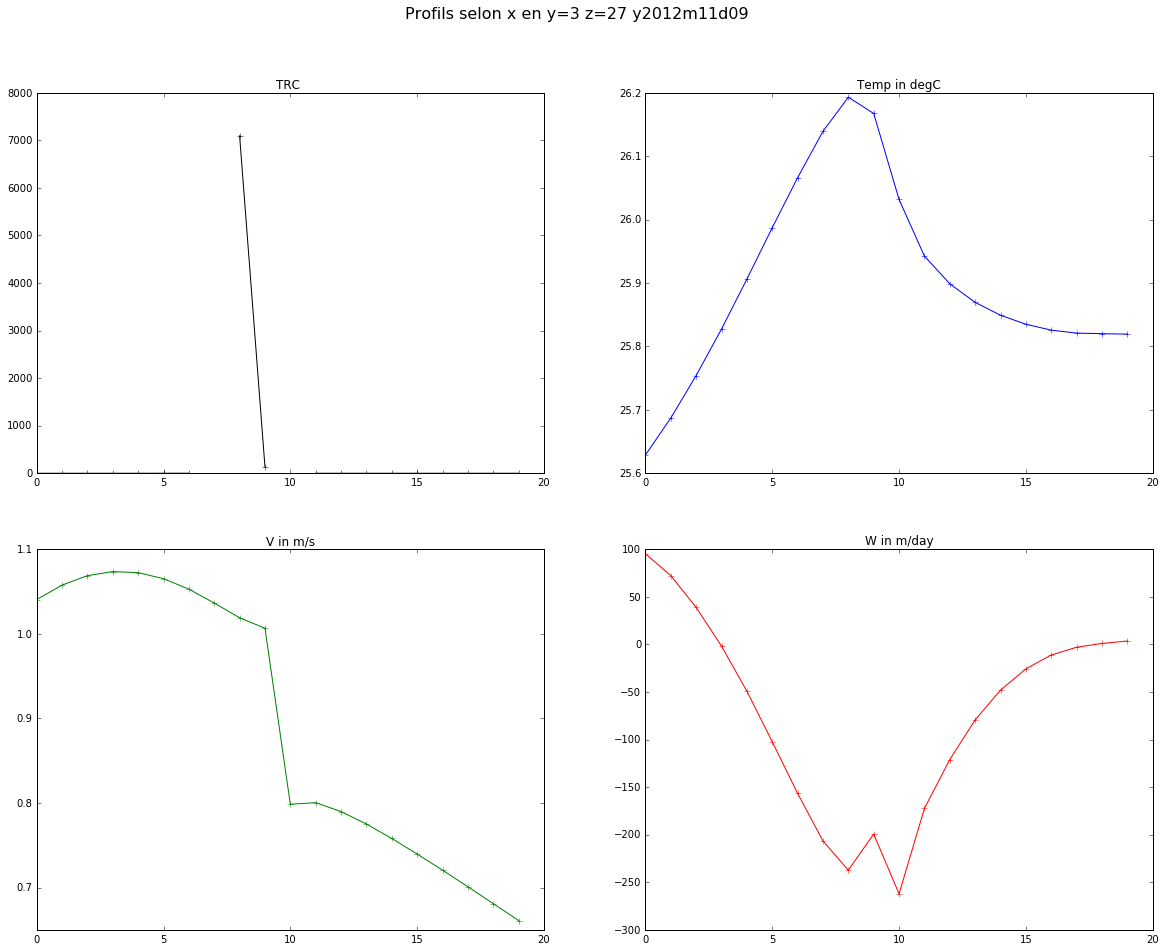

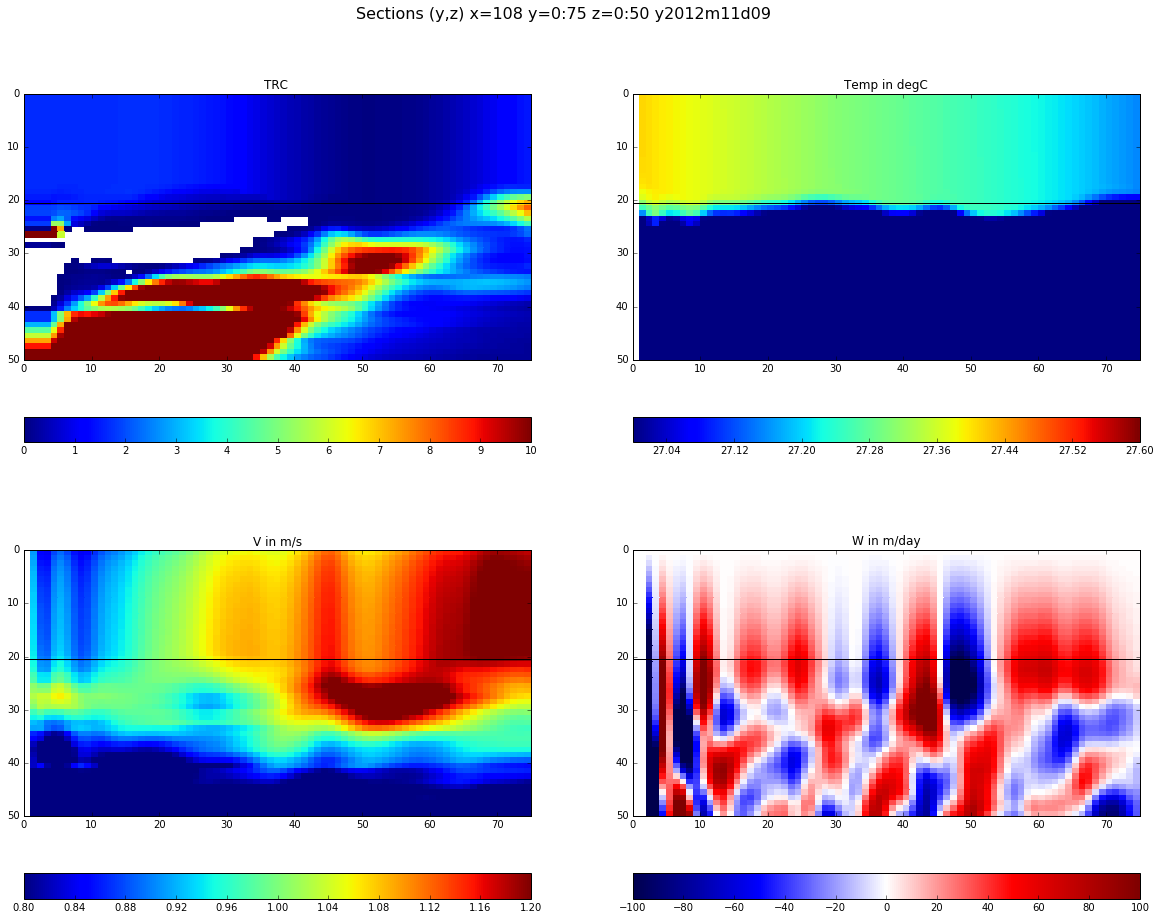

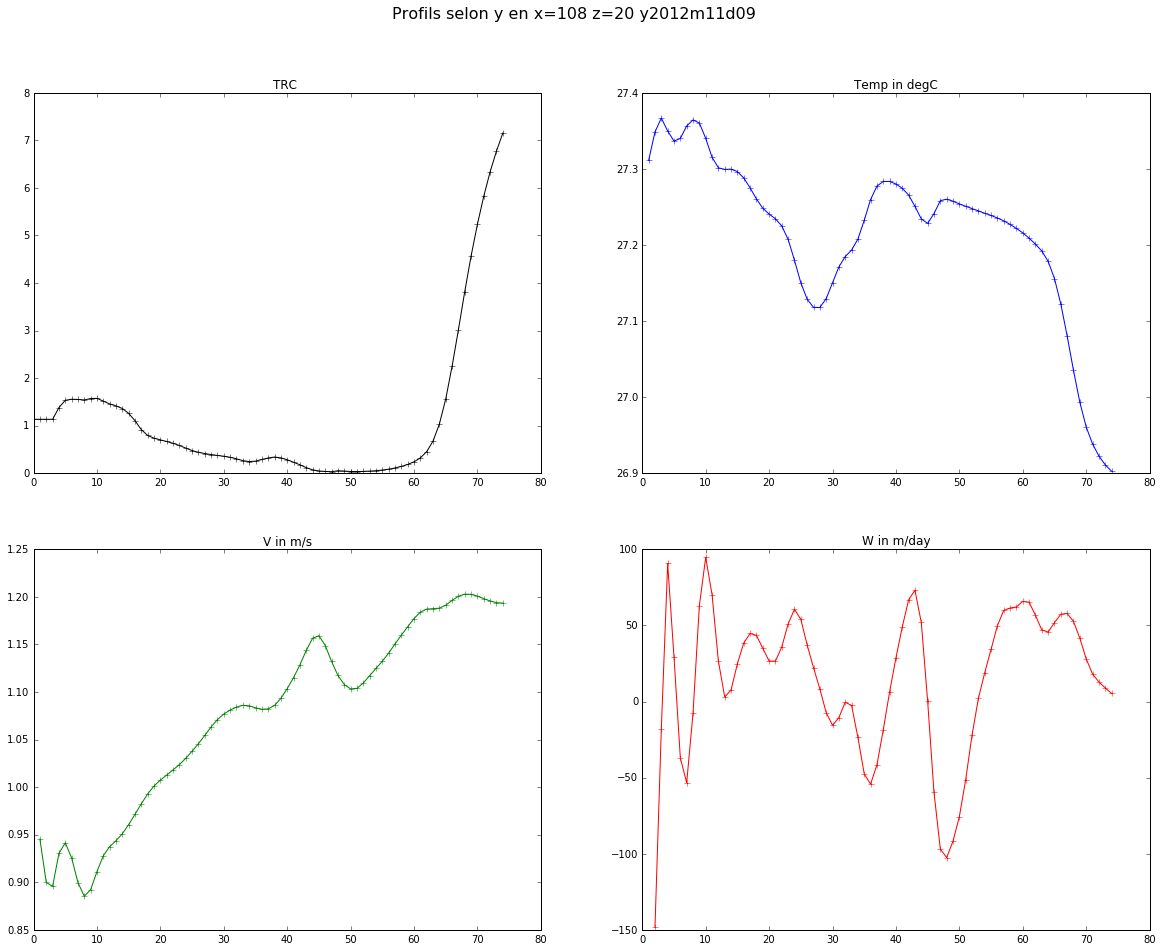

In [12]:
all_plots('y2012m11d09',1,10,27,27.6)

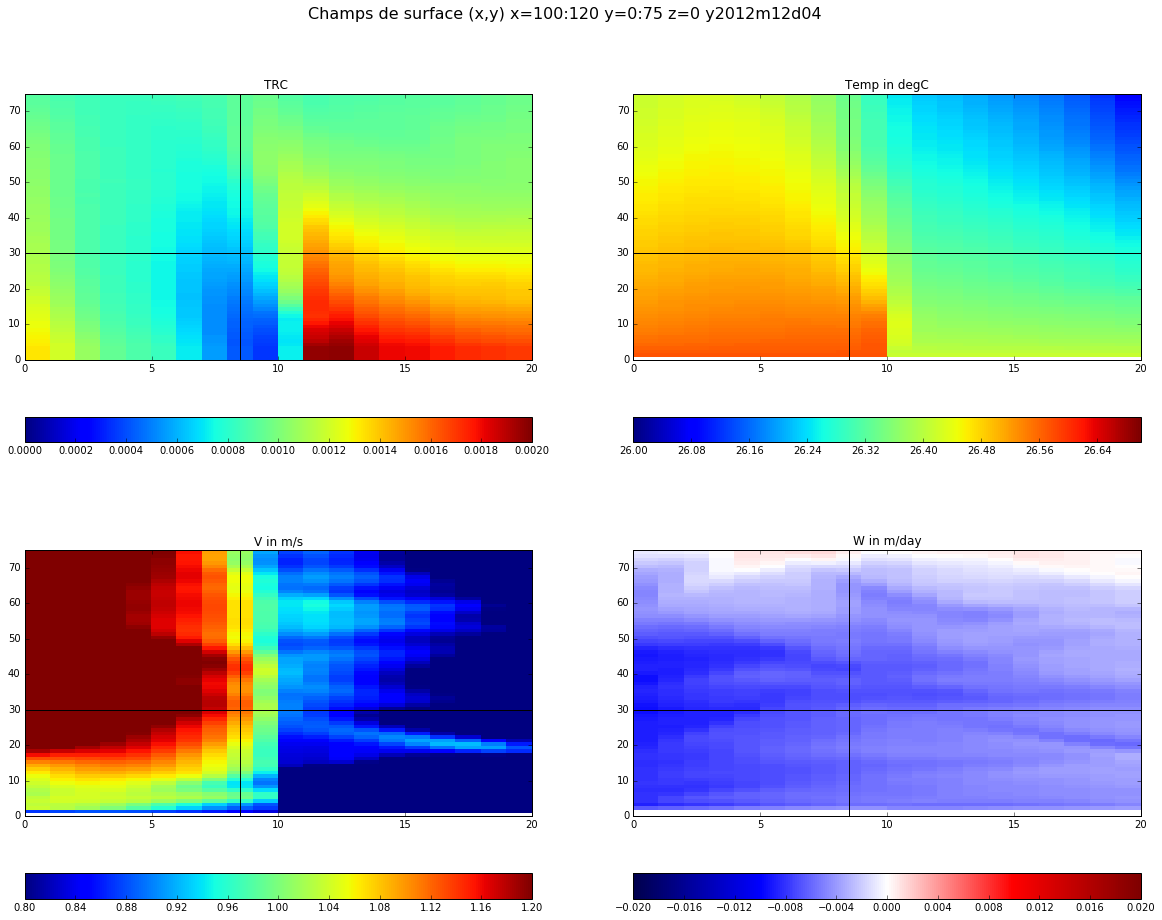

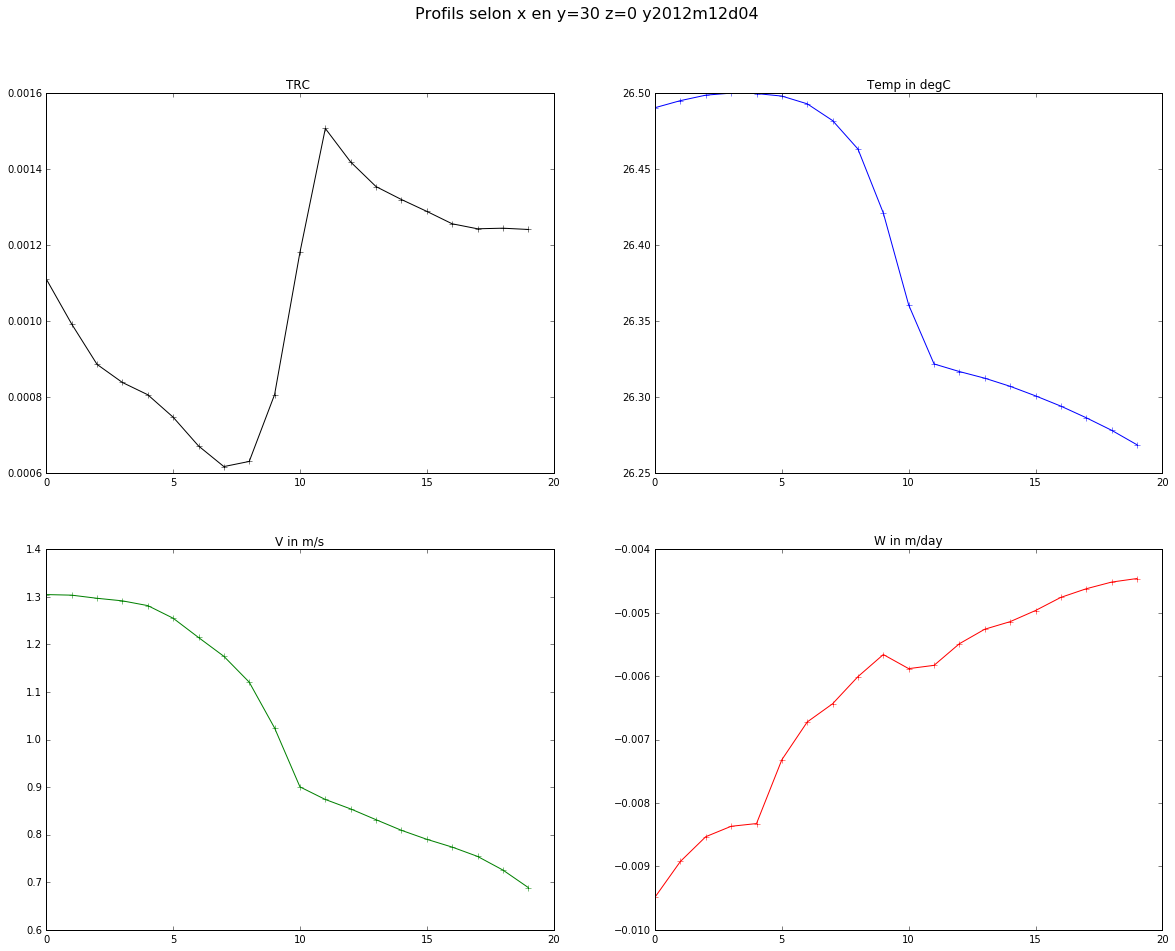

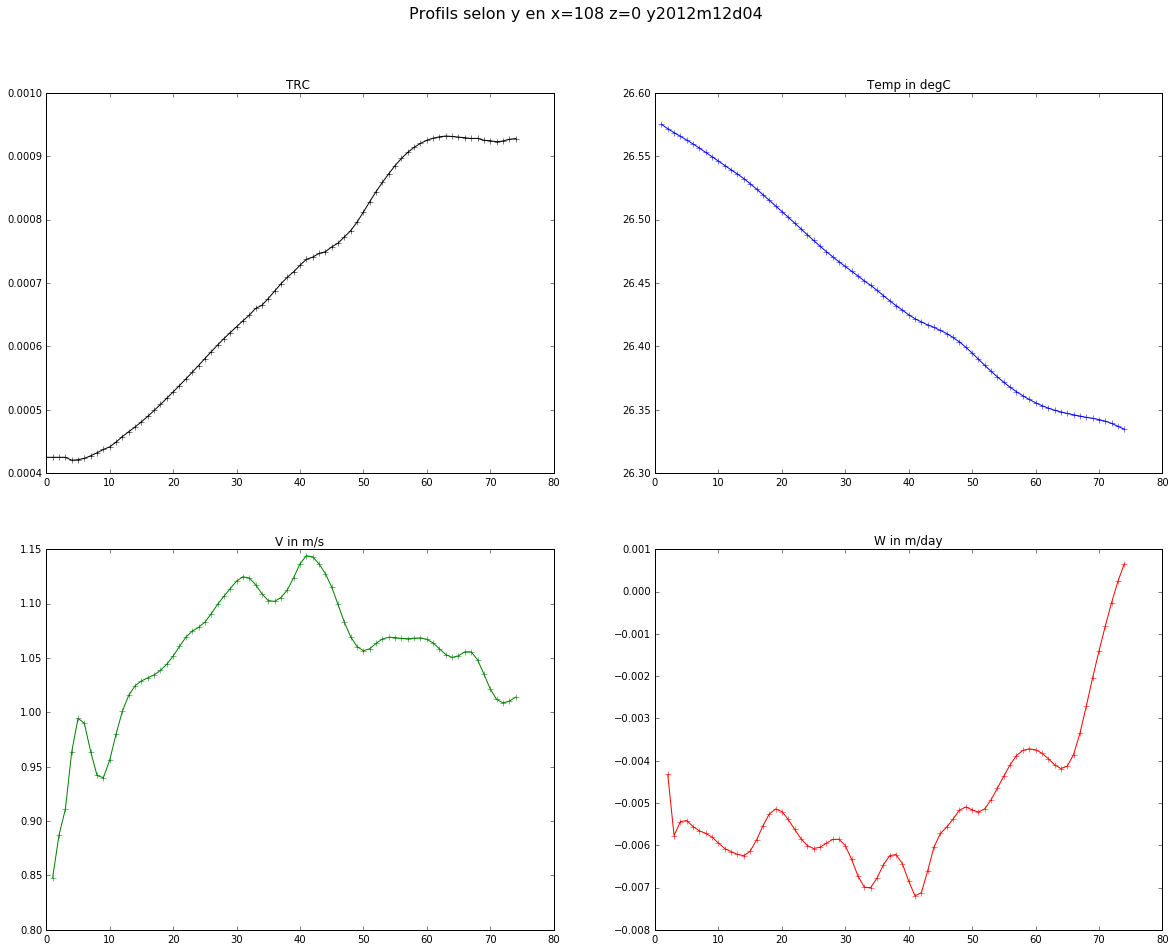

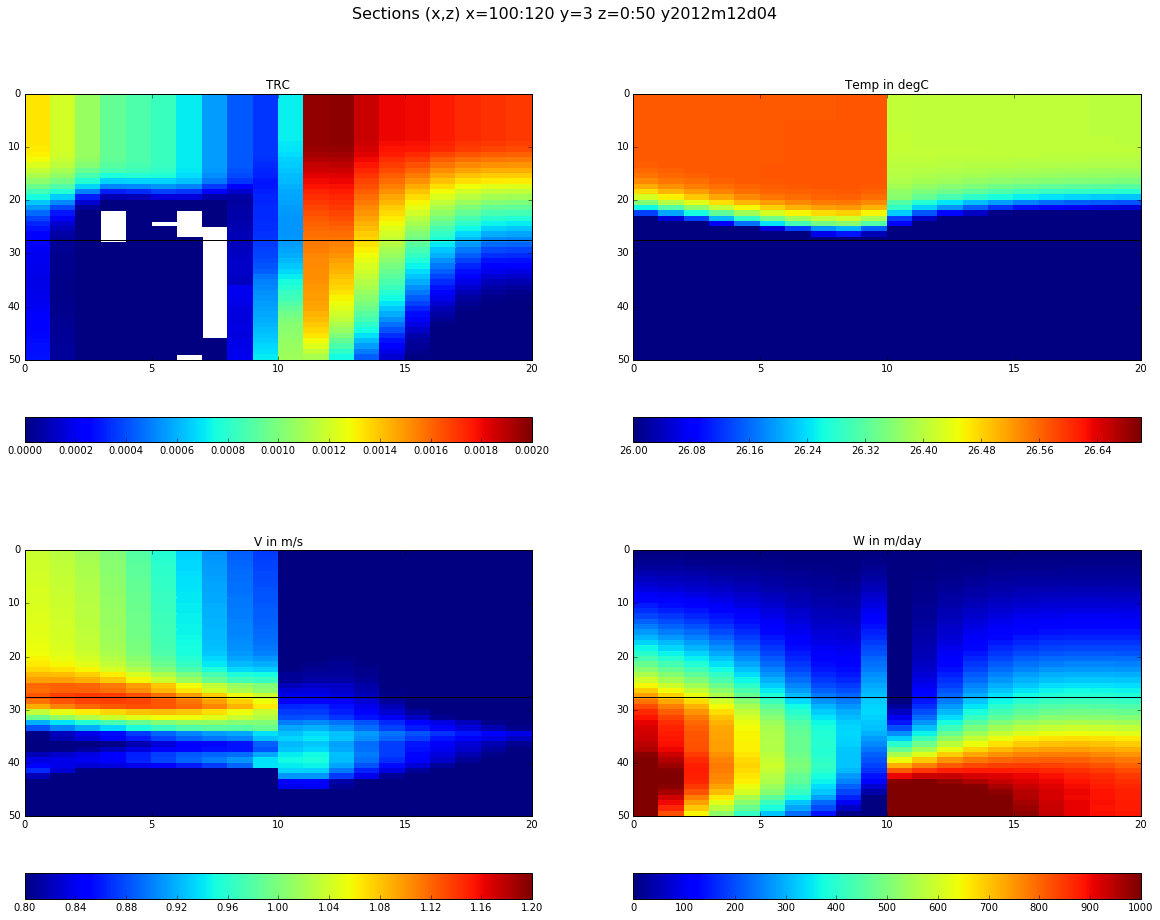

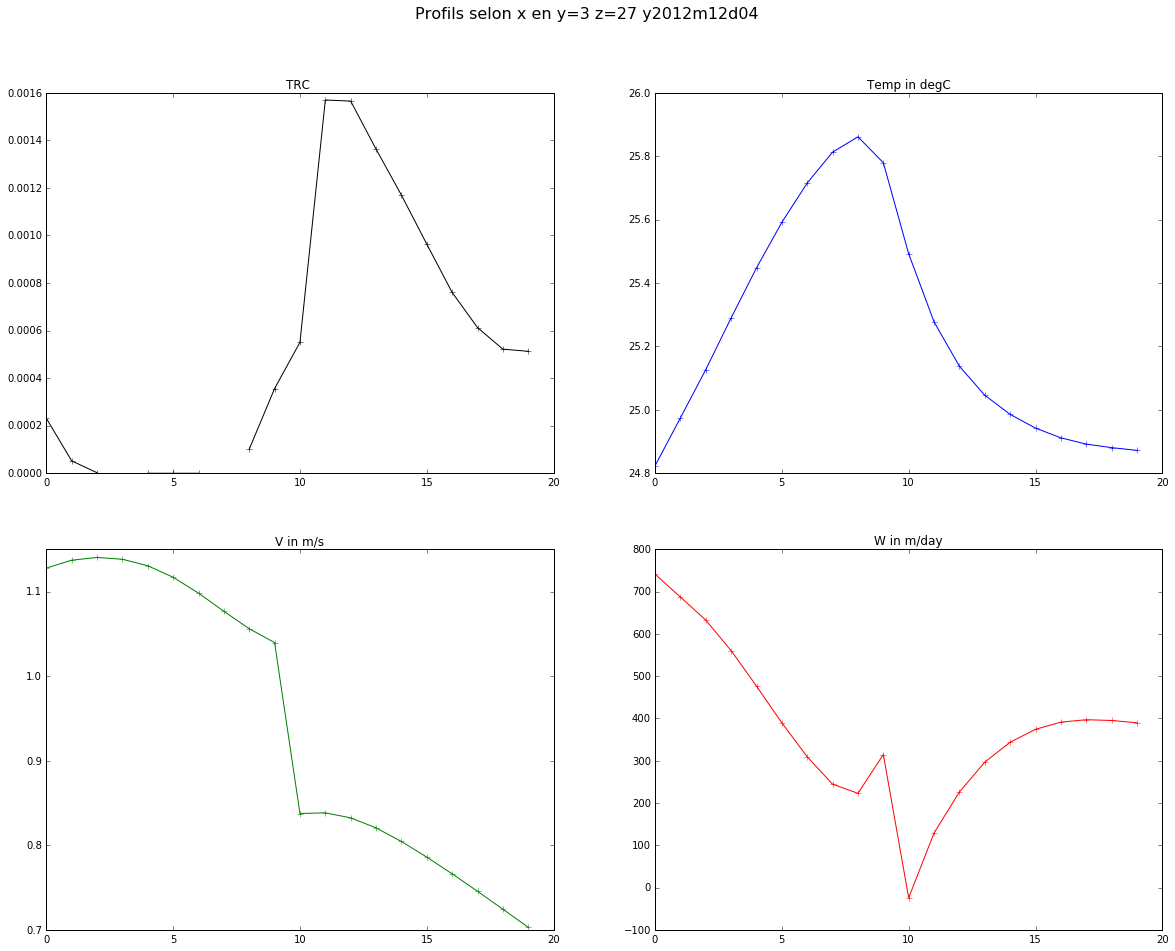

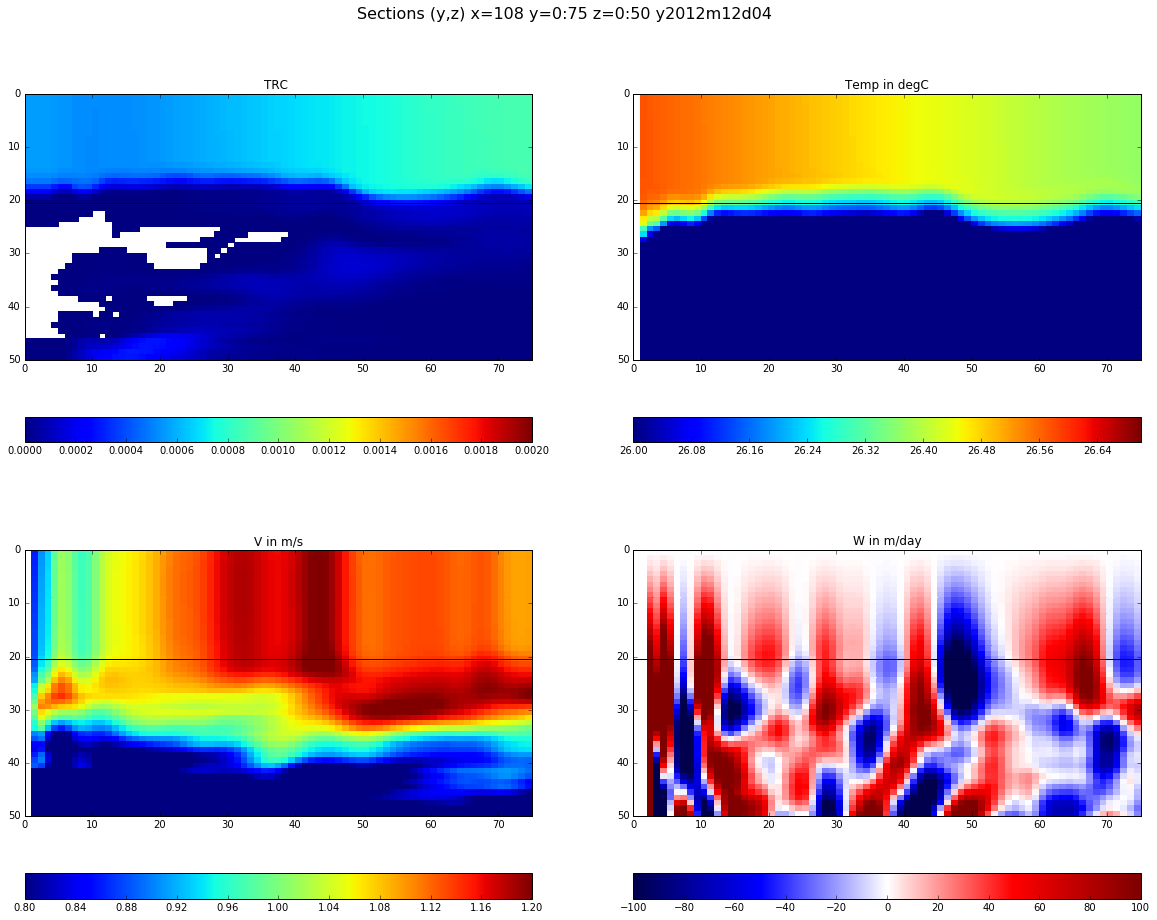

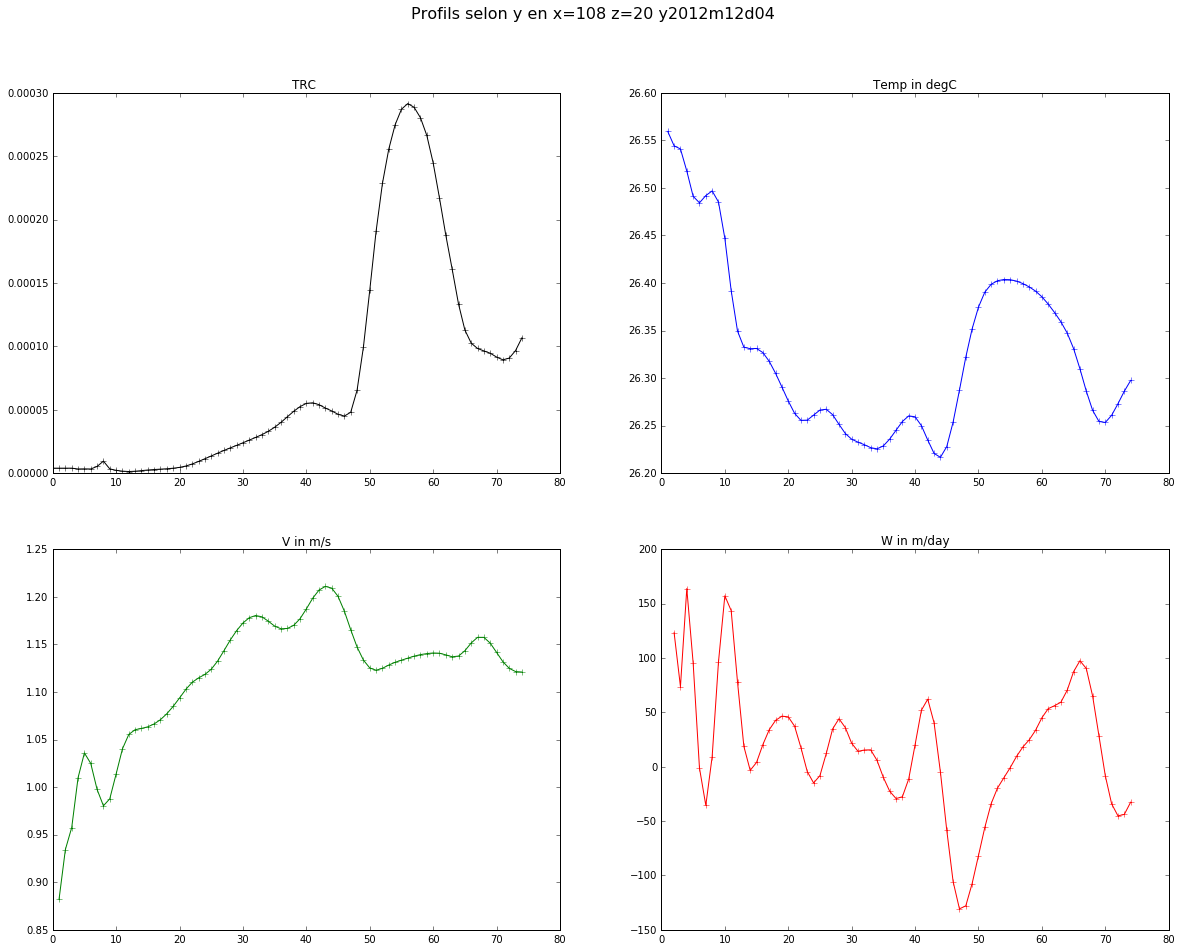

In [14]:
all_plots('y2012m12d04',0.002,0.002,26,26.7)

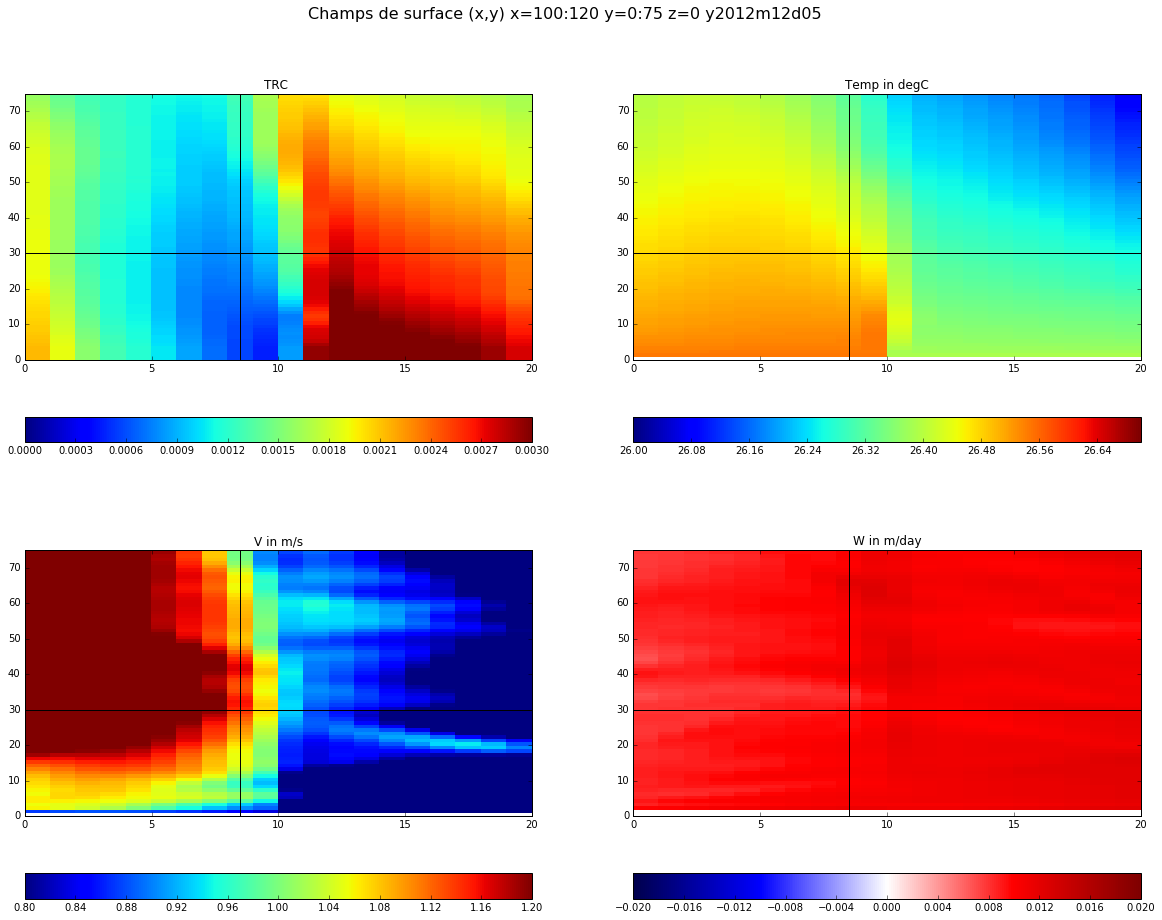

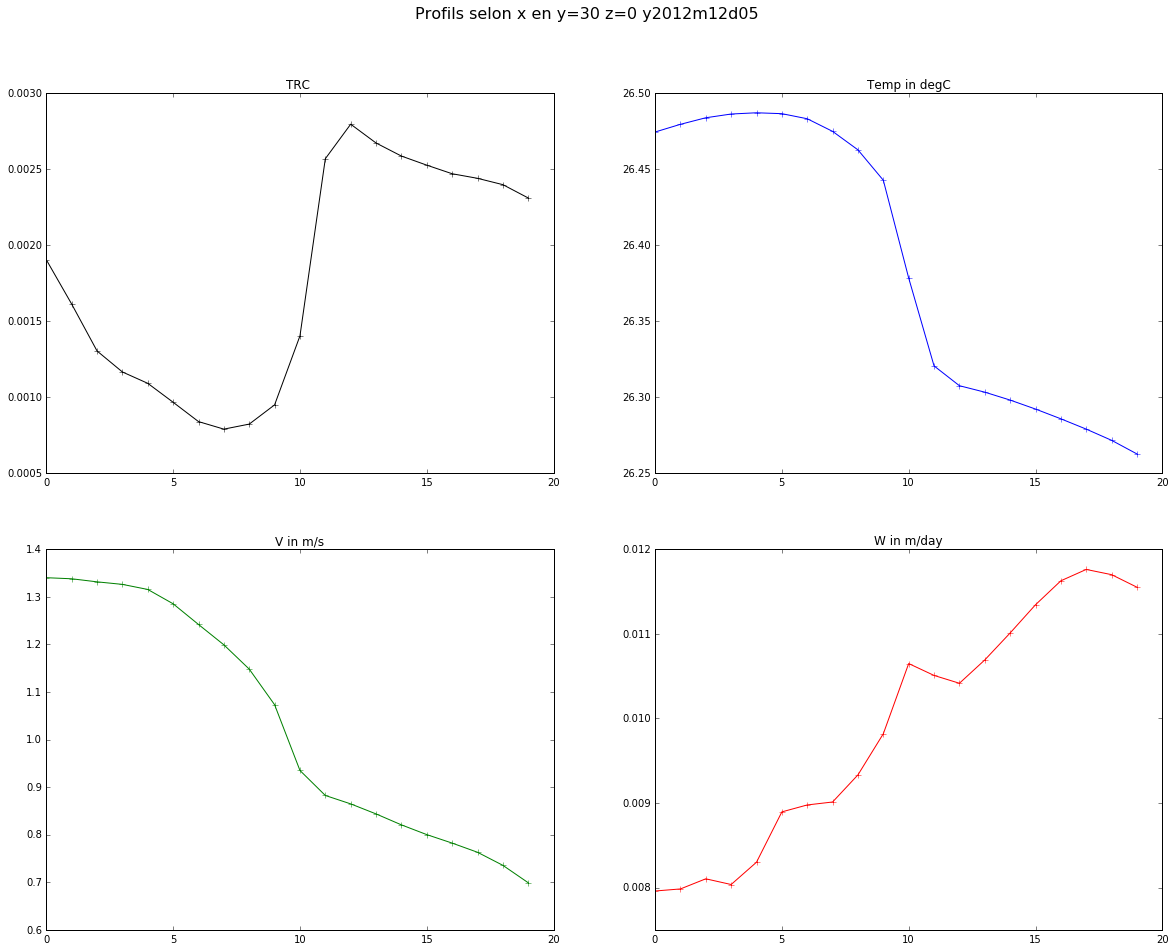

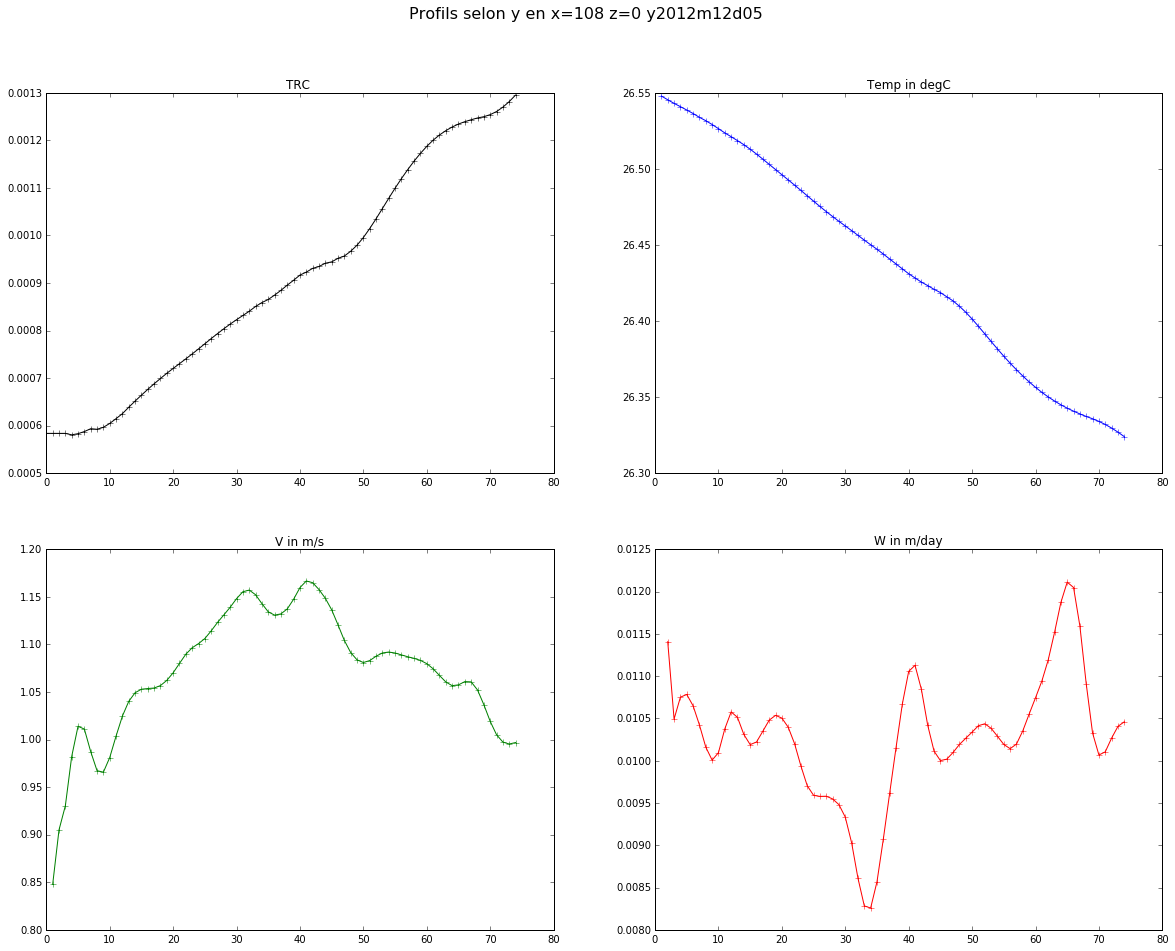

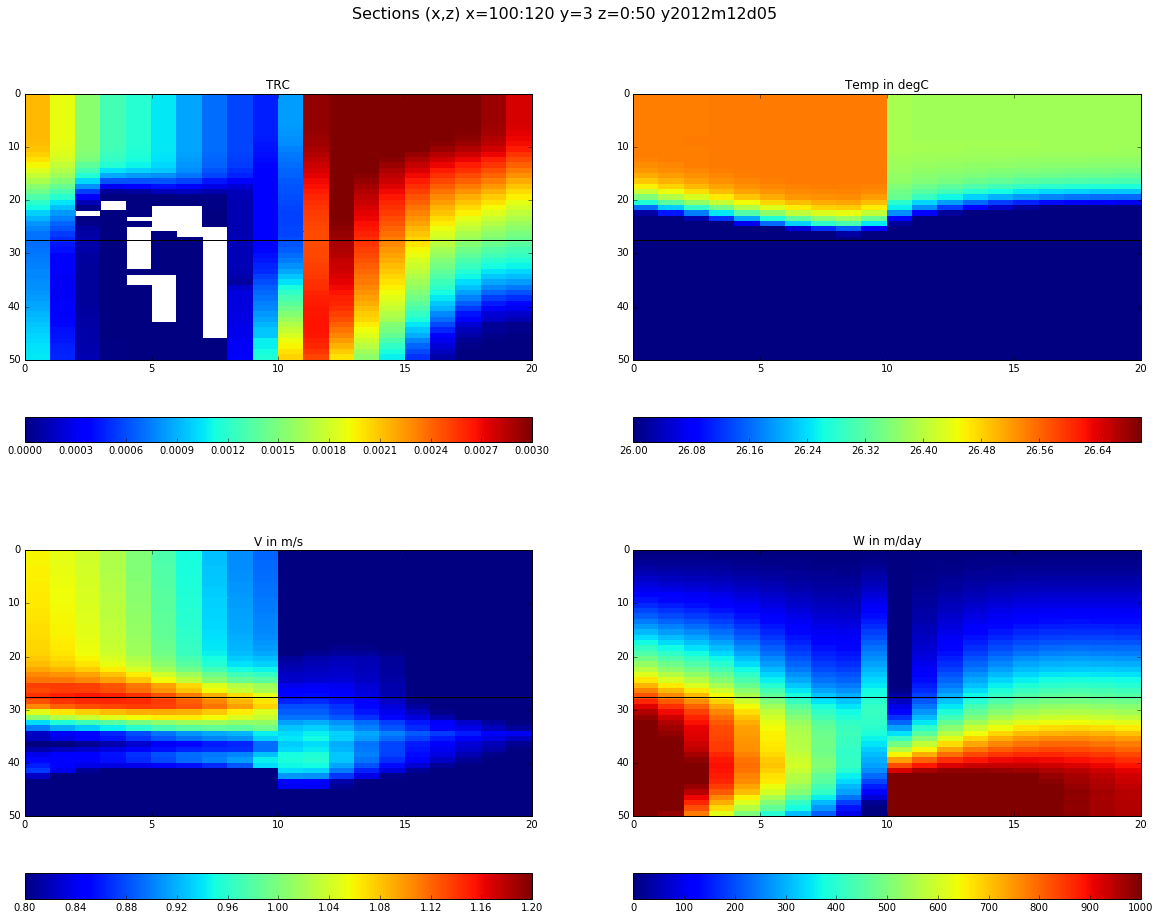

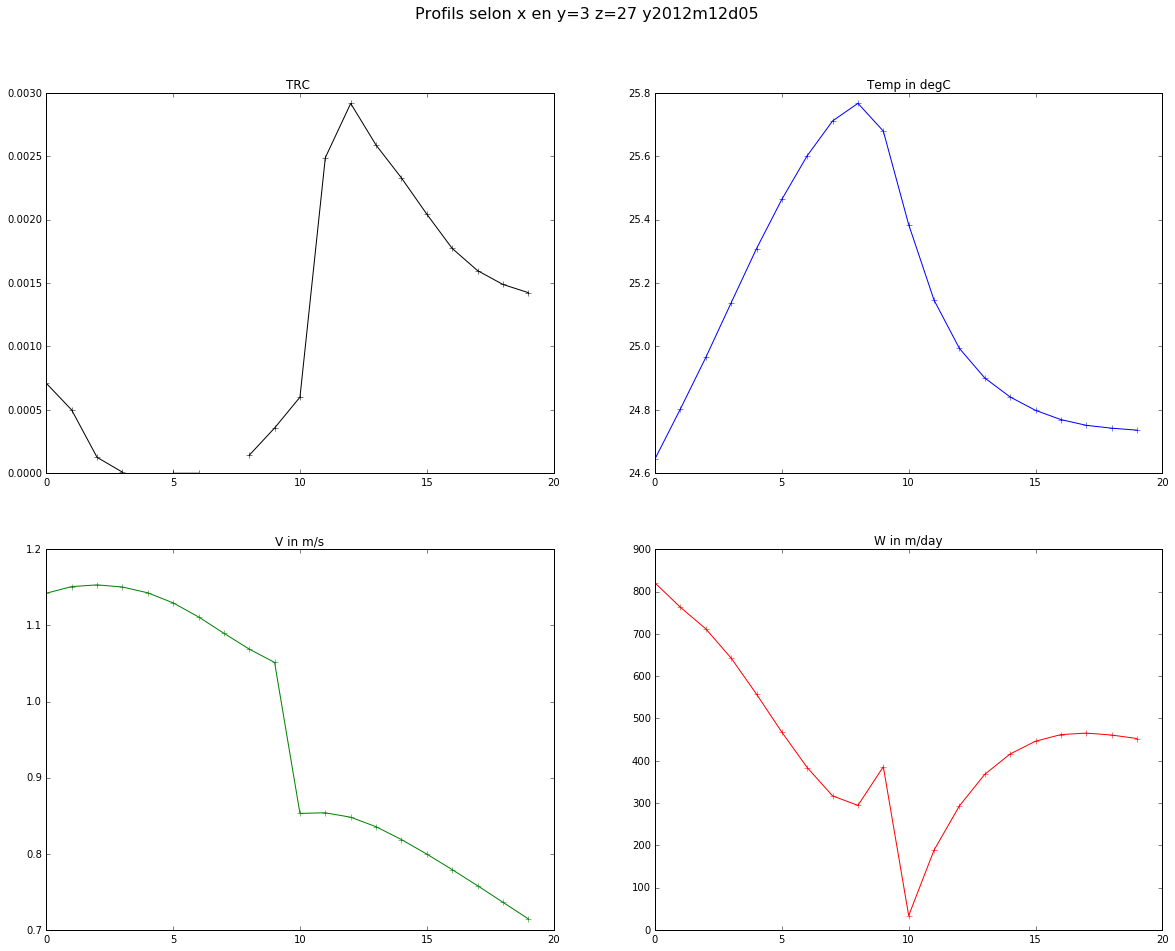

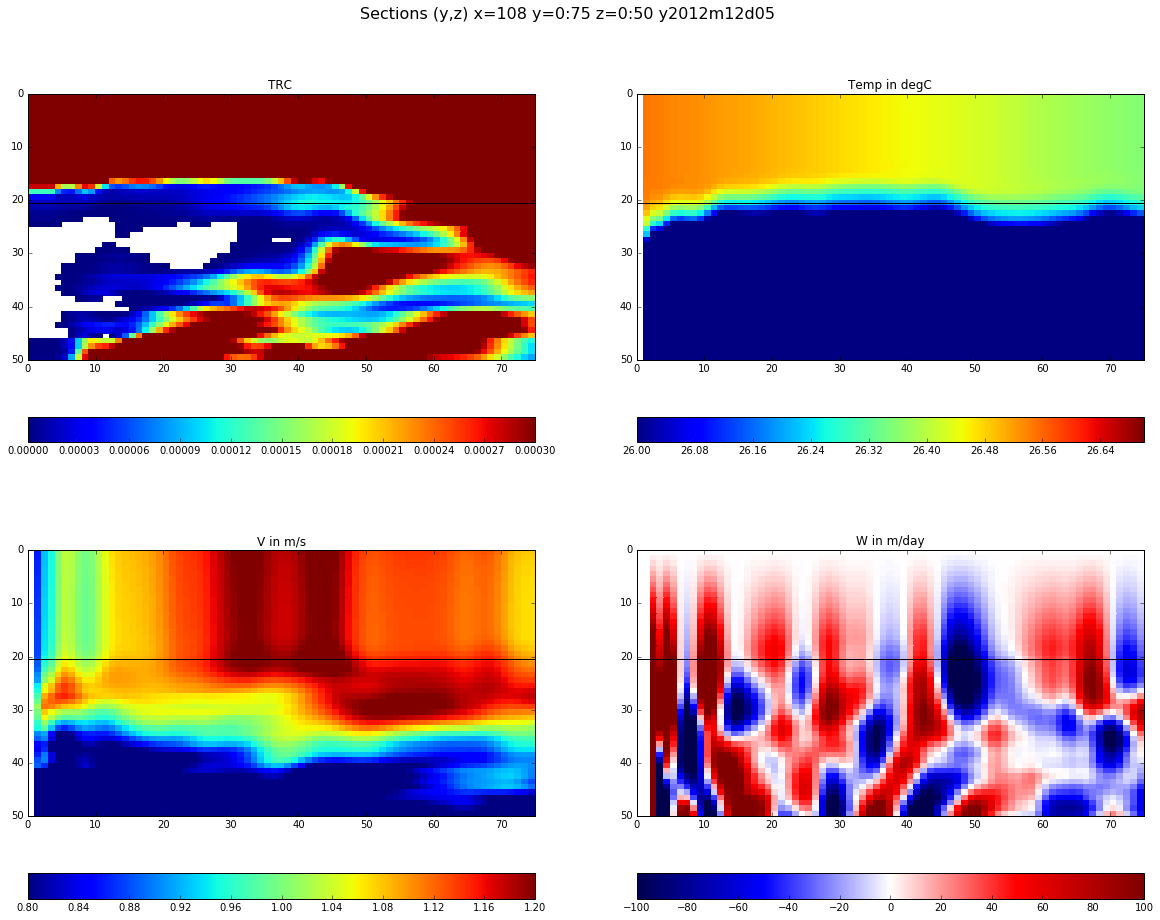

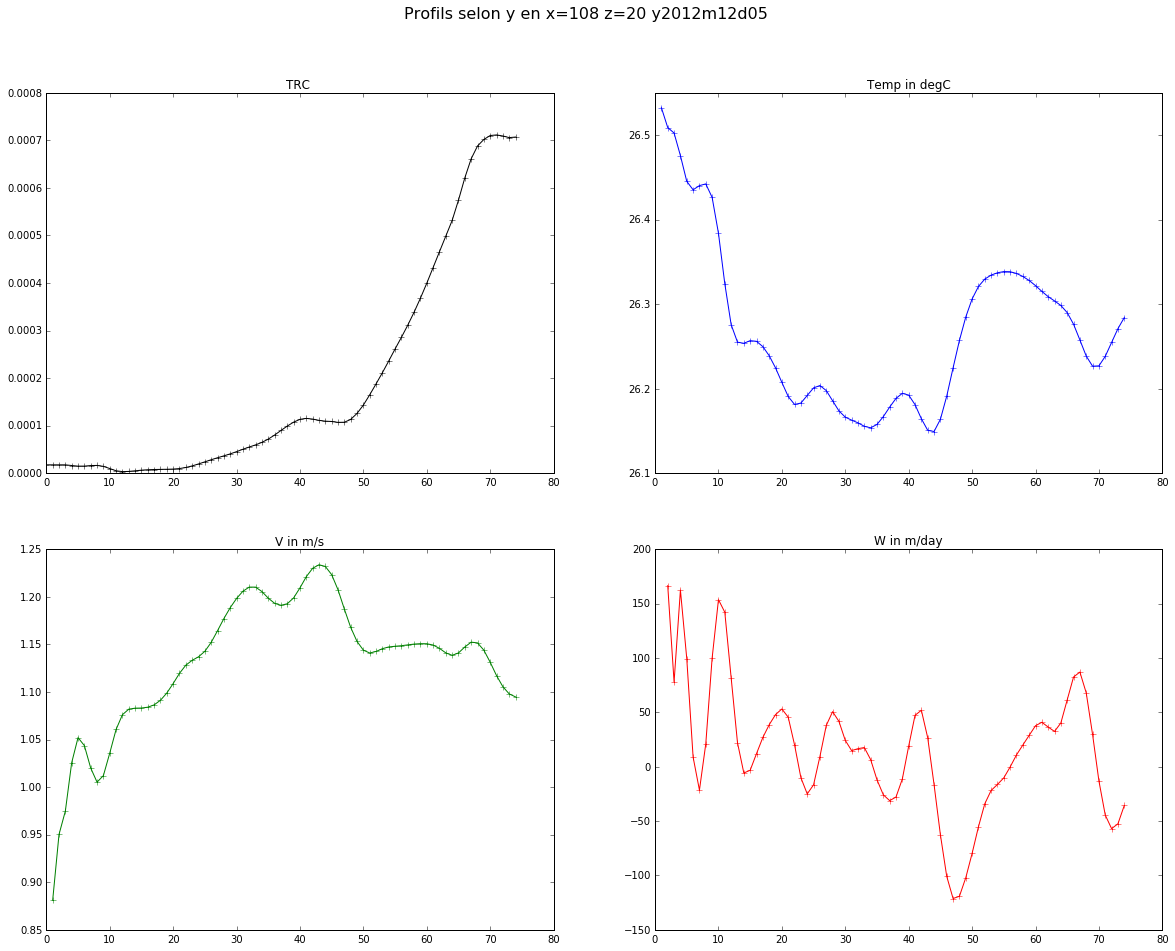

In [18]:
all_plots('y2012m12d05',0.003,0.0003,26,26.7)

In [10]:
all_plots('y2012m12d03',0.001,0.0005,26,27)

RuntimeError: No such file or directory